# Milestone 1

** Syntax SQL**

SELECT  
  limit_balance, sex, education_level, marital_status, age,
  pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, 
  bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, 
  pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, 
  default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 32000

## 1 - Perkenalan

Nama : St. Syakirah
Batch : FTDS-016-RMT

**Dataset**
Dataset yang digunakan adalah dataset credit card yang terdiri dari 2965 baris dan 24 kolom. 


**Objectives**

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

## 2 - Import Libraries

In [135]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split

#Splitting train-test-set
from sklearn.model_selection import train_test_split

#Fiture Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer

#Preprocessing scalling
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Preprocessing Encoding
from sklearn.preprocessing import OrdinalEncoder

#Preprocessing Label Encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#Training Model
#Logisticn Regression
from sklearn.linear_model import LogisticRegression
#SVM
from sklearn.svm import SVC
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Random Forest
from sklearn.ensemble import RandomForestClassifier 
#Adaboost
from sklearn.ensemble import AdaBoostClassifier 
#KNN
from sklearn.neighbors import KNeighborsClassifier
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Grid Search
from sklearn.model_selection import GridSearchCV
#Cross validation score
from sklearn.model_selection import cross_val_score
#calculate time
import timeit
#Hyperparameter Tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer
# Evaluation model menggunakan metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Model Inference
import joblib
import json



## Data Loading

In [1]:
#Loading data
data = pd.read_csv('F:\Hacktiv8\Fase 1\Milestone 1\h8dsft_P1M1_St_Syakirah.csv')

NameError: name 'pd' is not defined

In [3]:
# Menampilkan 5 Data teratas
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,...,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
3,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
4,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0


In [4]:
# Menampilkan 5 Data Terakhir
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000.0,1,2,1,41.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,700.0,860.0,0.0,0.0,0.0,700.0,860.0,2420.0,1
2961,20000.0,1,1,1,39.0,-1.0,-1.0,-1.0,-1.0,-1,...,630.0,664.0,598.0,700.0,600.0,700.0,700.0,600.0,1400.0,0
2962,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,...,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
2963,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0
2964,100000.0,2,1,2,28.0,0.0,0.0,0.0,2.0,0,...,10775.0,10998.0,12655.0,1300.0,3005.0,0.0,700.0,2000.0,1500.0,0


In [5]:
#Copy dataset
df = data.copy()

In [6]:
# Mengetahui dimensi data
data.shape

(2965, 24)

Data terdiri dari 2965 baris dan 24 kolom.

In [7]:
# Info Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Dataset terdiri dari 18 data yang bertipe float dan 6 bertipe integer.

**Datset Descriptiom**


Variable | Description
---|---
limit_balance | Amount of given credit in NT dollars (includes individual and family/supplementary credit
sex | Gender (1=male, 2=female)
education_level | Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
marital_status | Marital status (1=married, 2=single, 3=others)
age | Age in years
pay_0 | Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
pay_2 | Repayment status in August, 2005 (scale same as above)
pay_3 | Repayment status in July, 2005 (scale same as above)
pay_4 | Repayment status in June, 2005 (scale same as above)
pay_5 | Repayment status in May, 2005 (scale same as above)
pay_6 | Repayment status in April, 2005 (scale same as above)
bill_amt_2 | Amount of bill statement in August, 2005 (NT dollar)
bill_amt_3 | Amount of bill statement in July, 2005 (NT dollar)
bill_amt_4 | Amount of bill statement in June, 2005 (NT dollar)
bill_amt_5 | Amount of bill statement in May, 2005 (NT dollar)
bill_amt_6 | Amount of bill statement in April, 2005 (NT dollar)
pay_amt_1 | Amount of previous payment in September, 2005 (NT dollar)
pay_amt_2 | Amount of previous payment in August, 2005 (NT dollar)
pay_amt_3 | Amount of previous payment in July, 2005 (NT dollar)
pay_amt_4 | Amount of previous payment in June, 2005 (NT dollar)
pay_amt_5 | Amount of previous payment in May, 2005 (NT dollar)
pay_amt_6 | Amount of previous payment in April, 2005 (NT dollar)
default_payment_next_month | Default payment (1=yes, 0=no)

Informasi pada dataset terdiri dari data numerik. Namun, pada dasarnya terdiri dari data kategorik dan numerik. Data kategorik meiliputi informasi gender(sex), tingkat pendidikan(education_level), status pernikahan (marital_status), status pembayaran tiap bulan (pay_0, pay_2, pay_3, pay_4, pay_6, pay_6) dan default payment bulan depan. Sedangkan data numerik berupa informasi batasan kredit dalam NT dollars, jumlah tagihan bulan tertentu dalam NT dollars(bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6) dan jumlah tagihan sebelumnya(pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_1)

1 NT Dollar setara dengan 497,37.

In [9]:
#Mengganti nama kolom
data.rename({'pay_0': 'pay_sep', 'pay_2': 'pay_aug', 'pay_3': 'pay_july', 'pay_4': 'pay_june', 'pay_5': 'pay_may', 'pay_6': 'pay_apr', 'bill_amt_2' : 'bill_amt_aug', 'bill_amt_3' : 'bill_amt_july', 'bill_amt_4' : 'bill_amt_june', 'bill_amt_5' : 'bill_amt_may', 'bill_amt_6' : 'bill_amt_apr', 'pay_amt_1':'pay_amt_sep', 'pay_amt_2':'pay_amt_aug', 'pay_amt_3':'pay_amt_july', 'pay_amt_4':'pay_amt_june', 'pay_amt_5':'pay_amt_may', 'pay_amt_6':'pay_amt_apr', 'default_payment_next_month':'payment_next_month'}, axis='columns', inplace=True)
data.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,...,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,payment_next_month
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,...,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0,0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0


## Eksplorasi Data Analisis.

### Analisis Presentase Pembayaran Kartu Kredit Bulan Depan

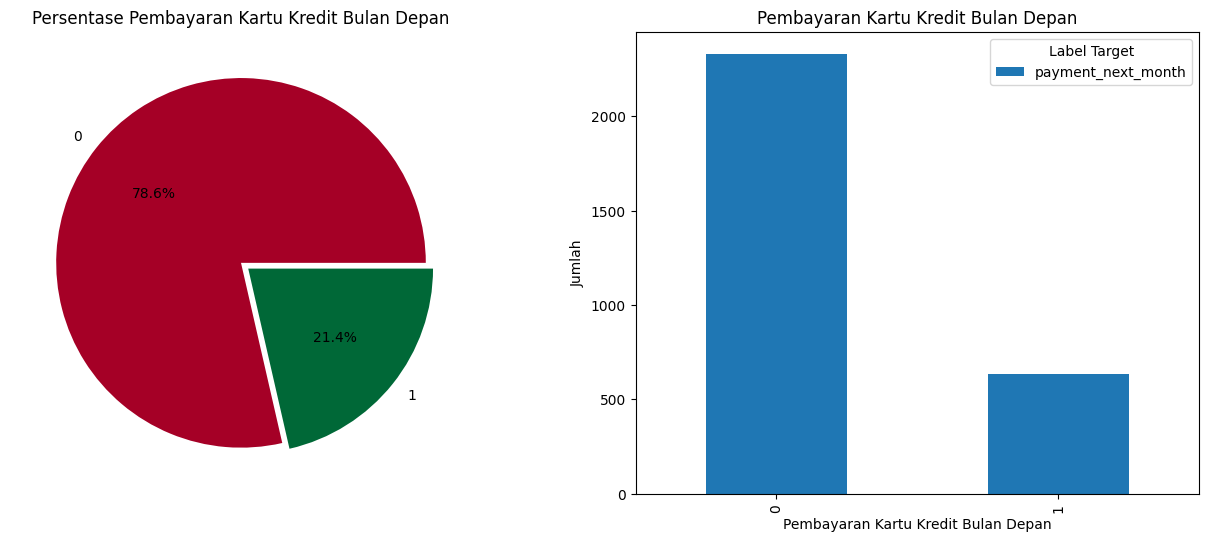

In [10]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
data['payment_next_month'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=[0,0.05],
    cmap='RdYlGn',
    ax=ax[0]
)
ax[0].set_title('Persentase Pembayaran Kartu Kredit Bulan Depan')
ax[0].set_ylabel('')

#Barchart besaran setiap nilai pada kelas target
data.groupby('payment_next_month').agg({'payment_next_month':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Pembayaran Kartu Kredit Bulan Depan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Pembayaran Kartu Kredit Bulan Depan')
ax[1].legend(title='Label Target')


Data pembayaran kartu kredit menunjukkan lebih dari 2000 klien tidak membayar tagihan kartu kredit bulan depan dan kurang dari 1000 klien yang membayar tagihan kartu kredit bulan depan. Presentase juga menunjukkan klien yang tidak membayar kartu kredit label **No(0)** sebesar **78,6%** dan presentase klien yang membayar kartu kredit label **Yss(1)** sebesar **21,4%**. Dengan demikian, dapat disimpulkan lebih banyak klien yang tidak membayar tagihan bulan depan.

### Analisis Pembayaran Kartu Kredit Bulan Depan Berdasarkan Kelompok Gender

Note : Angka 1 mewakili male dan angka 2 mewakili female

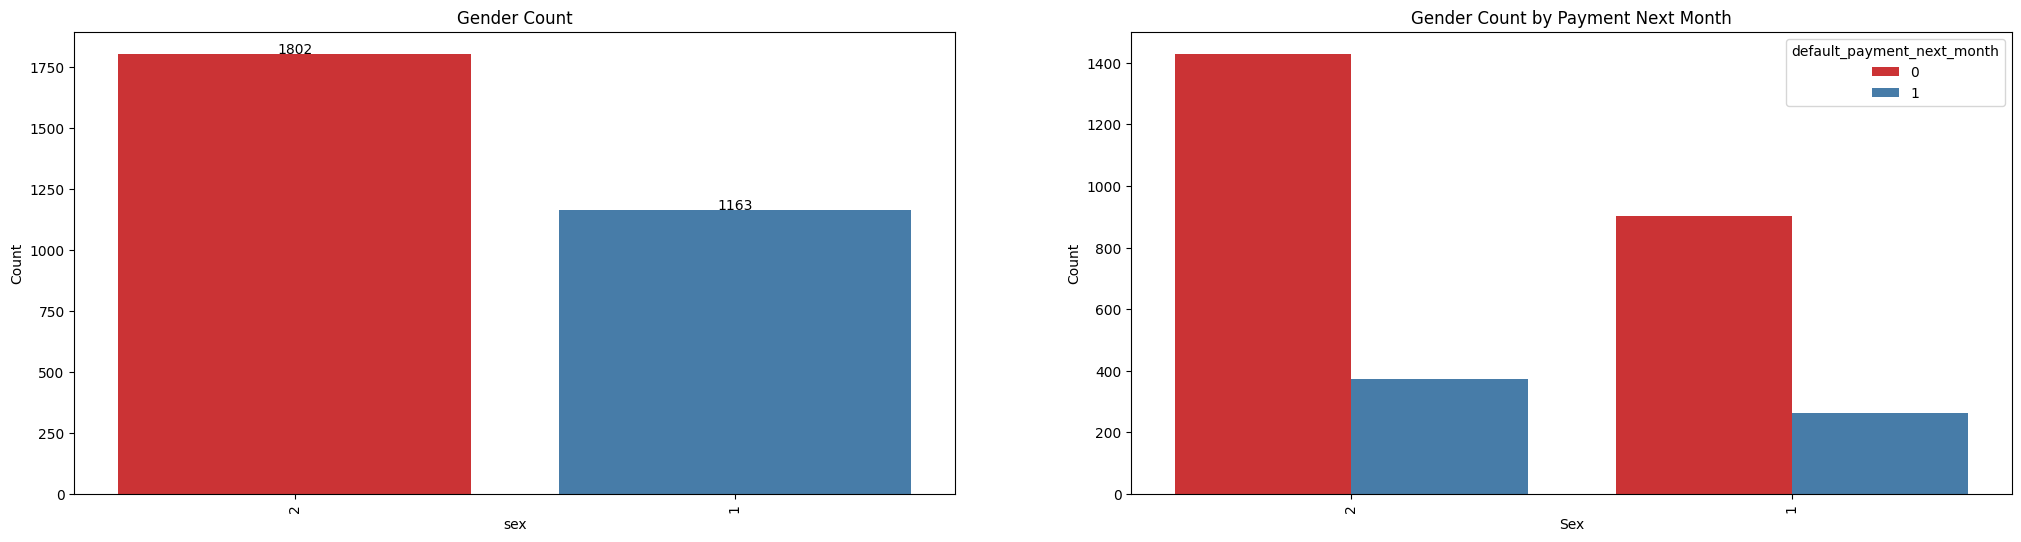

In [12]:
#Analisis pembayaran tagihan kartu kredit bulan depan berdasarkan gender
#apa ini perlu?
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='sex', data=data, order=data.sex.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('Gender Count')
plt.xlabel('sex')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.countplot(x='sex', data=data, order=data.sex.value_counts().index, palette='Set1', hue='default_payment_next_month')
plt.title('Gender Count by Payment Next Month')
plt.xlabel('Sex')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

Dataset menunjukkan jumlah gender**Female** lebih banyak dibanding dengan gender **Male**. Perbandingan jumlah gender **Female** dan gender **male** yang melakukan pembayaran kartu kredit bulan depan tidaklah signifikan. Namun Perbandingan jumlah gender yang tidak membayar tagihan kartu kredit bulan depan cukup signifikan, lebih banyak klien **female** yang **tidak membayar** tagihan bulan depan.

### Analisis Pembayaran Kartu Kredit Tiap Bulan

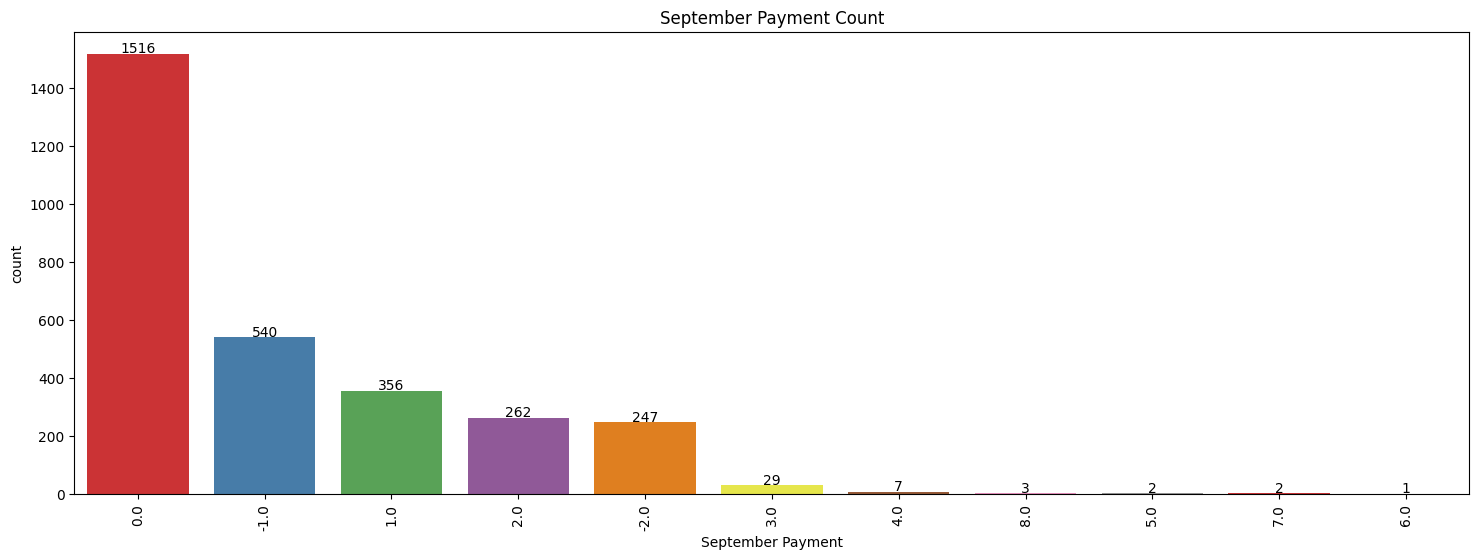

In [12]:
#Analisis pembayaran tagihan kartu kredit September 2005
plt.figure(figsize=(18, 6))
fig = sns.countplot(x='pay_sep', data=data, order=data.pay_sep.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('September Payment Count')
plt.xlabel('September Payment')
plt.xticks(rotation=90)
plt.show()

Data payment september menunjukkan 662 klien memiliki tunggakan pada pembayaran kartu kredit sebelumnya dan 807 klien yang telah lebih dulu melakukan pembayaran untuk tagihan bulan selanjutnya. Data payment september didominasi oleh kliern yang belum melakukan pembayaran pada bulan itu juga.

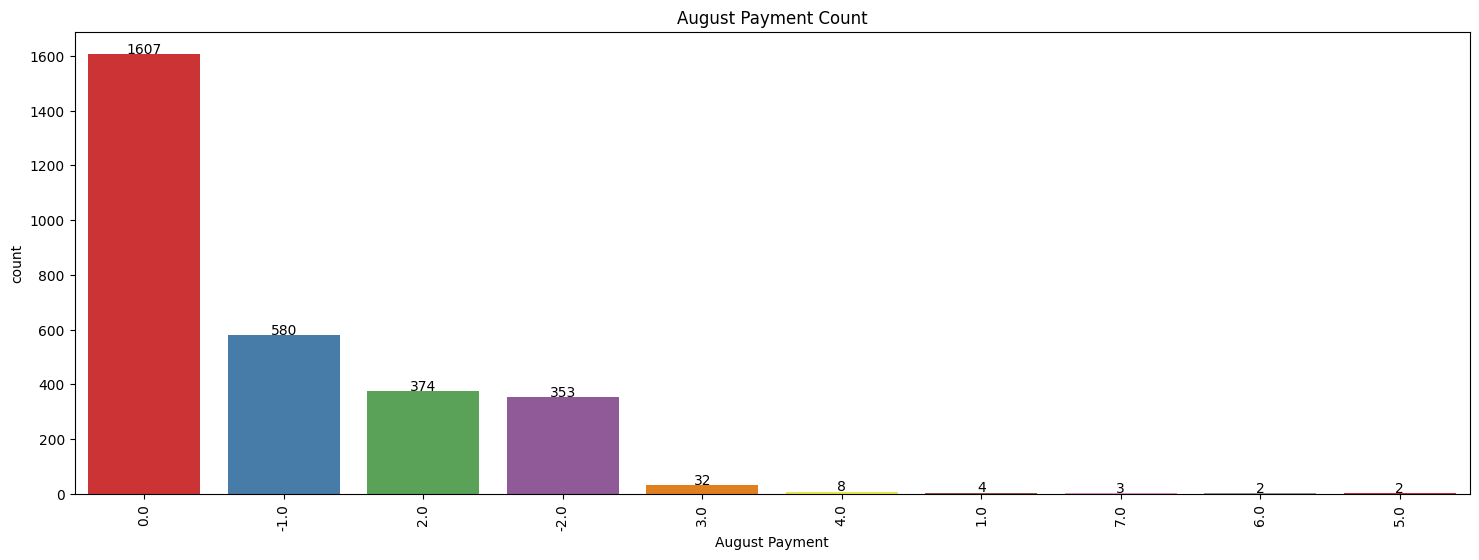

In [13]:
#Analisis pembayaran tagihan kartu kredit Agustus 2005
plt.figure(figsize=(18, 6))
fig = sns.countplot(x='pay_aug', data=data, order=data.pay_aug.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('August Payment Count')
plt.xlabel('August Payment')
plt.xticks(rotation=90)
plt.show()

Data payment bulan Agustus juga didominasi oleh klien yang belum membayar tagihan untuk bulan agustus. Data klien yang melakukan pembayaran untuk bulan selanjutnya lebih banyak dibanding klien yang menunggak pembayaran

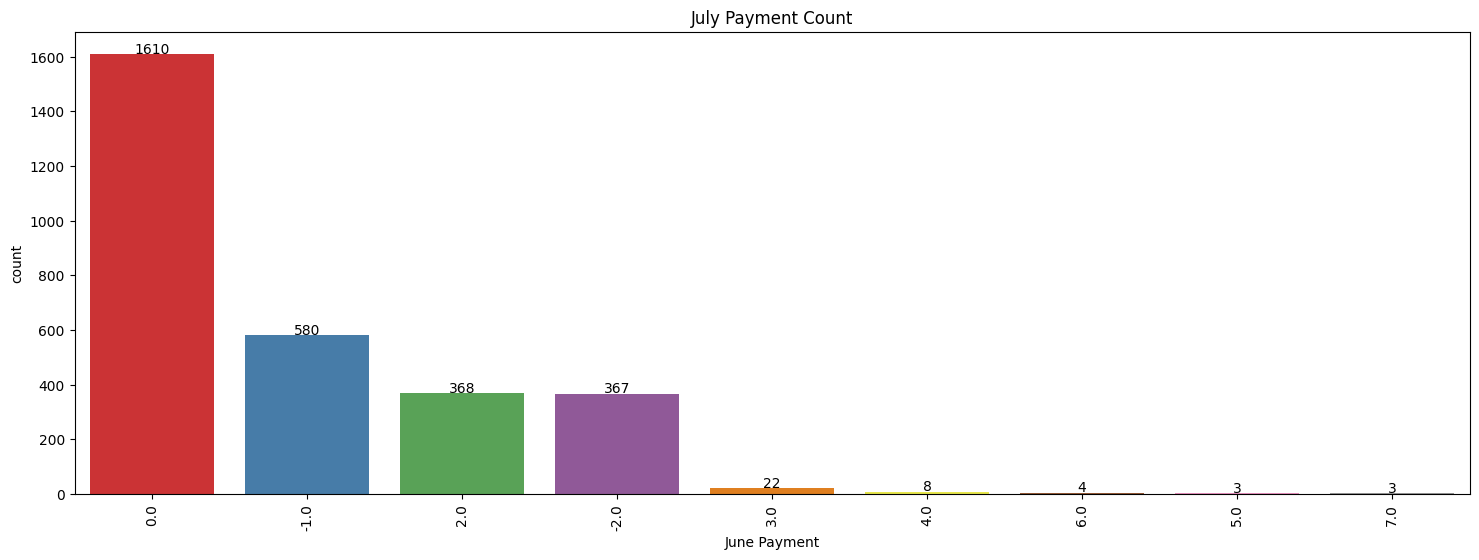

In [14]:
#Analisis pembayaran tagihan kartu kredit July 2005
plt.figure(figsize=(18, 6))
fig = sns.countplot(x='pay_july', data=data, order=data.pay_july.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('July Payment Count')
plt.xlabel('July Payment')
plt.xticks(rotation=90)
plt.show()

Mayoritas klien pada bulan July adalah klien yang belum melakukan pembayaran pada bulan itu juga. Ada beberapa klien yang sudah melakukan pembayaran lebih dulu dan ada juga beberapa klien yang memiliki tunggakan pembayaran.

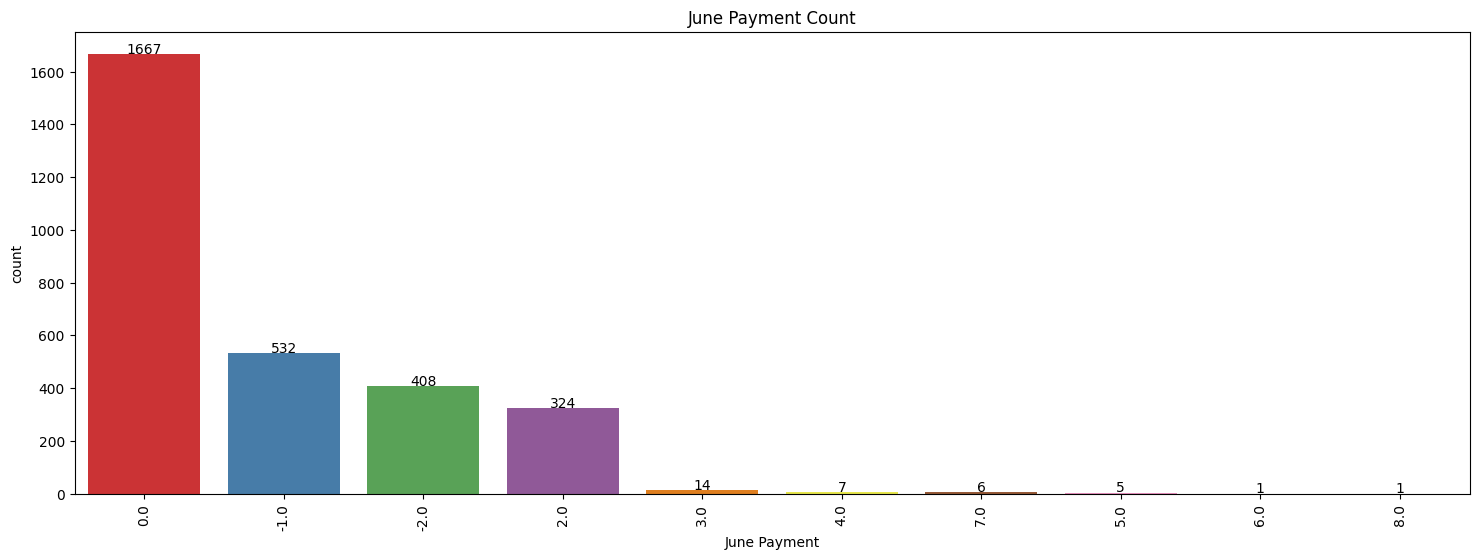

In [15]:
#Analisis pembayaran tagihan kartu kredit June 2005
plt.figure(figsize=(18, 6))
fig = sns.countplot(x='pay_june', data=data, order=data.pay_june.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('June Payment Count')
plt.xlabel('June Payment')
plt.xticks(rotation=90)
plt.show()

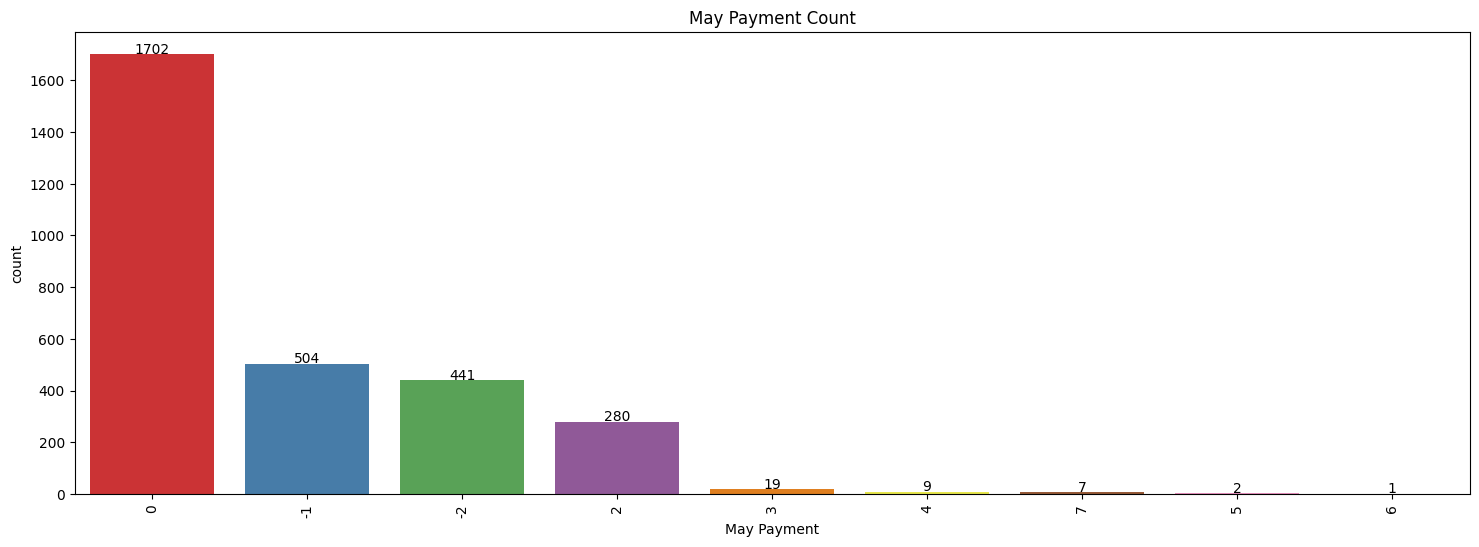

In [17]:
#Analisis pembayaran tagihan kartu kredit May 2005
plt.figure(figsize=(18, 6))
fig = sns.countplot(x='pay_may', data=data, order=data.pay_may.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('May Payment Count')
plt.xlabel('May Payment')
plt.xticks(rotation=90)
plt.show()

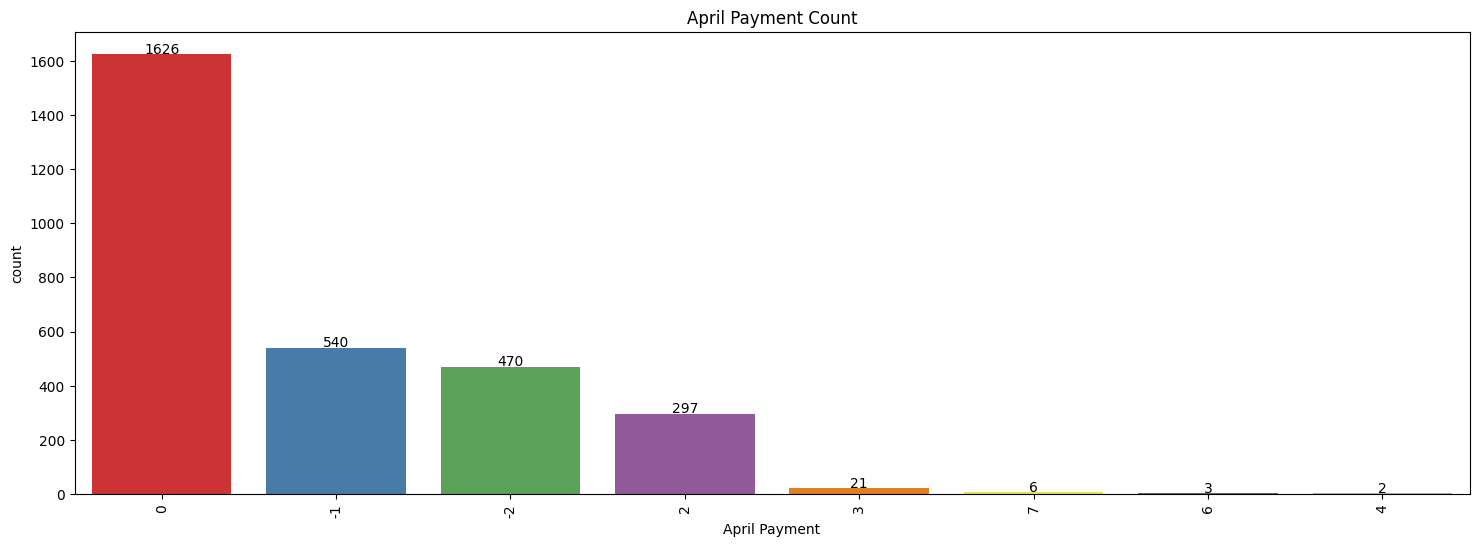

In [19]:
#Analisis pembayaran tagihan kartu kredit April 2005
plt.figure(figsize=(18, 6))
fig = sns.countplot(x='pay_apr', data=data, order=data.pay_apr.value_counts().index, palette='Set1')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")
plt.title('April Payment Count')
plt.xlabel('April Payment')
plt.xticks(rotation=90)
plt.show()

Mayoritas" klien belum melakukan pembayaran pada bulan april, tetapi tidak menunggak pada bulan sebelumnya. Minoritas klien yang belum belum membayar pada bulan april serta menunggak pada bulan sebelumnya. Ada berapa klien yang sudah lebih dulu membayar tagihan bulan april dan bulan sebelumnya.

Hasil analisis pembayaran tagihan kartu kredit bulan depan menunjukkan mayoritas klien tidak membayar tunggakan untuk bulan saat ini (misal bulan saat ini september, maka tidak melakukan pembayaran untuk bulan september). Rata" klien menunggak satu bulan karena tidak melakukan pembayaran kartu kredit pada bulan saat ini. Namun, membayar tagihan pada bulan sebelumnya karena setiap bulan jumlah kliern yang memiliki tunggakan hanya sedikit. Hal ini menyebabkan mayoritas pembayaran bulan depan adalah klien yang tidak melakukan pembayaran bulan tersebut.

### Analisis Limit Balance

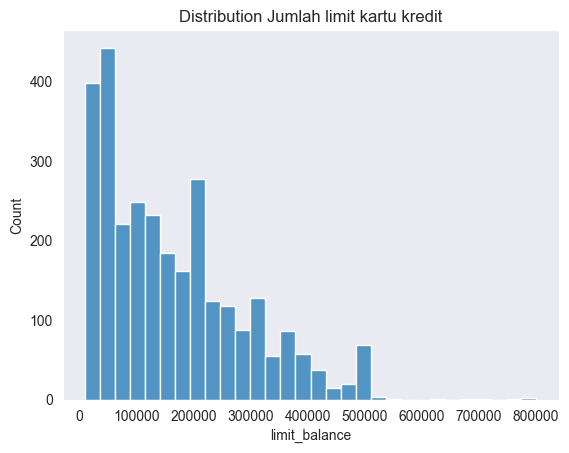


Skewness Value limit_balance:  1.0004416437793329

Mean limit_balance:  163369.30860033727


In [59]:
#Distribusi data
sns.histplot(data['limit_balance'], bins=30)
plt.title('Distribution Jumlah limit kartu kredit')
plt.show()
#Print nilai skewness
print('\nSkewness Value limit_balance: ', data['limit_balance'].skew())
print('\nMean limit_balance: ', data['limit_balance'].mean())

Limit balance adalah jumlah batasan kartu kredit dalam NT$. Rata" klien memiliki limit balance 163,369 NT$ atau sekitar Rp.81,254,839.50. Nilai dan histogram menunjukkan limit balance memiliki distribusi tidak normal atau skewed. Hasil boxplot menunjukkan, batas normal limit balance sekitar 200,000$. Namun ada beberapa klien memiliki limit balance lebih dari 500000 NT$ yang dideteksi sebagai outlier.

### Analisis Usia Klien

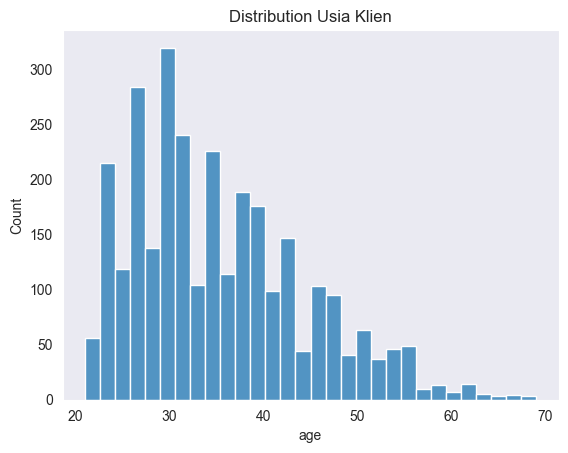


Skewness Value of age:  1.0004416437793329

Mean of age:  163369.30860033727


In [57]:
#Distribusi data
sns.histplot(data['age'], bins=30)
plt.title('Distribution Usia Klien')
plt.show()
#Print nilai skewness
print('\nSkewness Value of age: ', data['limit_balance'].skew())
print('\nMean of age: ', data['limit_balance'].mean())

Rata" klien yang memiliki kartu kredit berusia 35 tahun. Boxplot menunjukkan rentang usia klien dari kisaran 28 tahun hingga 42 tahun, ada beberapa klien yang usianya lebih dari 60 tahun yang dideteksi sebagai outlier. Distribusi usia memiliki distribusi tidak normal atau skewed.

### Analisis Distribusi Data dan Outliers

In [42]:
def visualize_data_distribution(data, features, targetName='payment_next_month', targetLabel=['No','Yes']):
    """
        Definition : Function for visualize diagram for all features
        Parameters : 
            * Features --> List of features
        Return : 0
    """
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize=(15, 4))
        plt.title(col)
        plt.subplot(131)
        sns.histplot(
            data[col][data[targetName]==0],
            label=targetLabel[0]+" :"+" Skew = " +
            str(np.round(data[col][data[targetName] == 0].skew(), 2)),
            kde=True,
            color='y',
            stat="density",
            linewidth=0
        )
        sns.histplot(
            data[col][data[targetName]==1],
            label=targetLabel[1]+" :"+" Skew = " +
            str(np.round(data[col][data[targetName] == 1].skew(), 2)),
            kde=True,
            color='r',
            stat="density",
            linewidth=0
        )
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x = data[targetName],
            y = data[col],
            hue = data[targetName])
        plt.subplot(133)
        stats.probplot(x=data[col], plot=plt)
        plt.tight_layout()
        plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


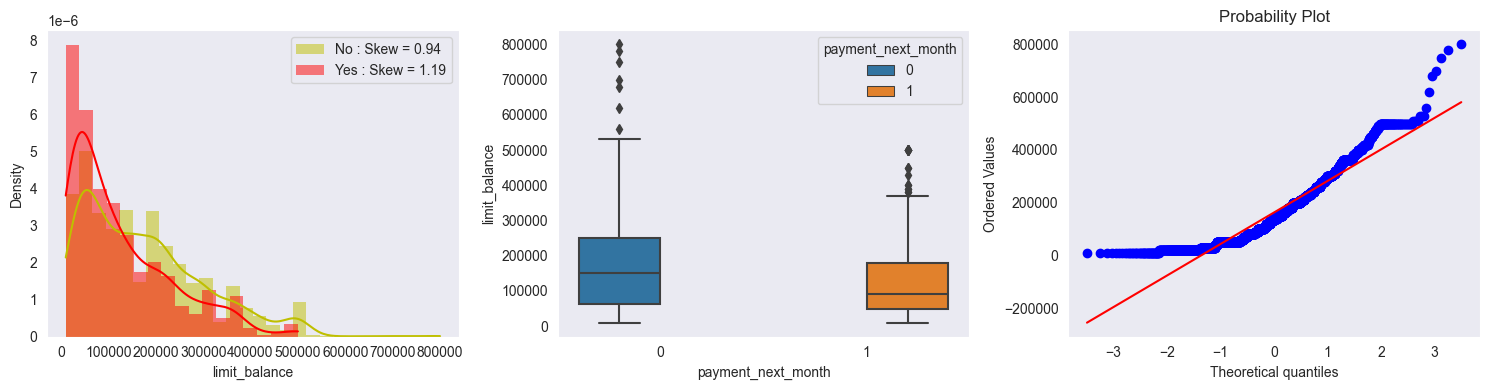

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


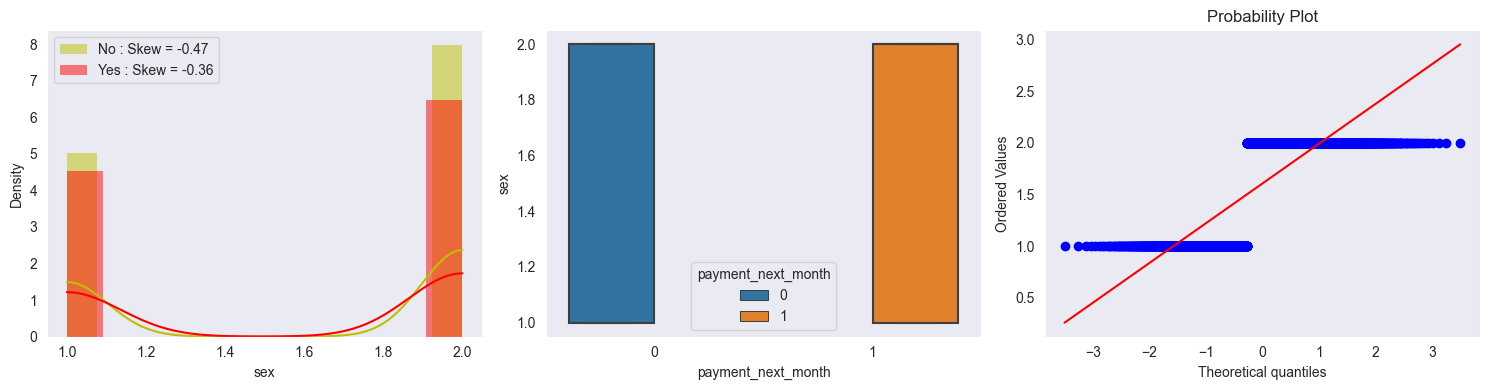

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


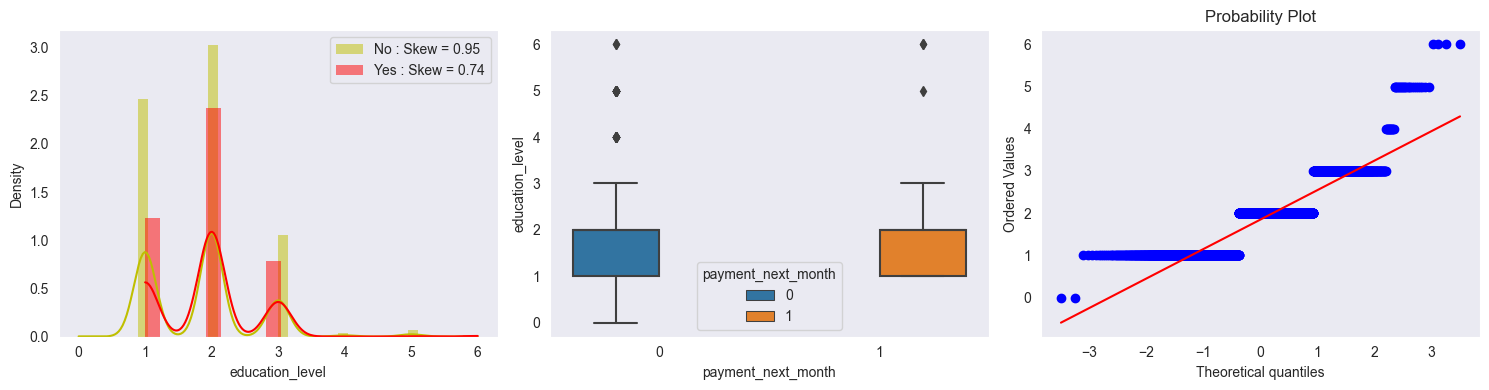

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


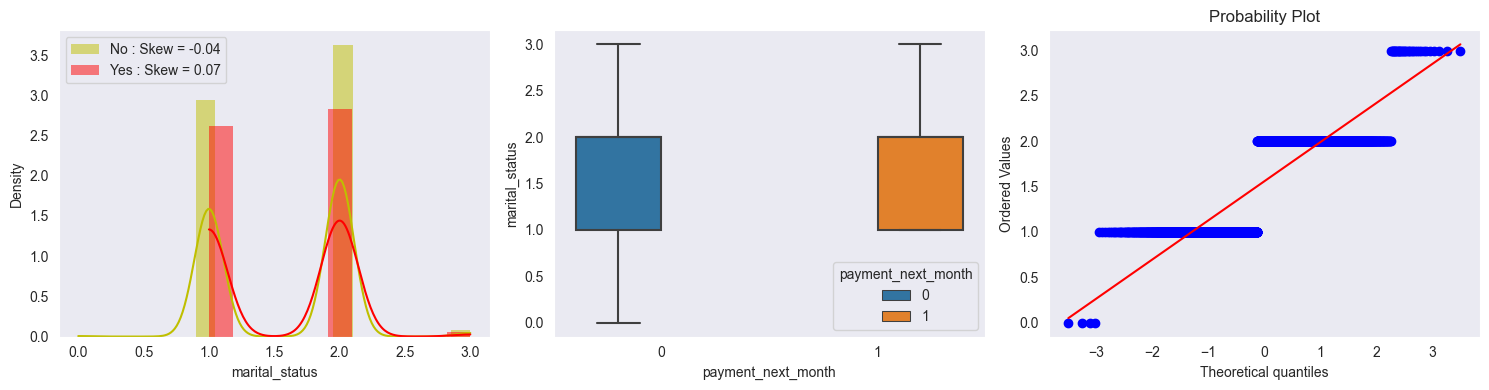

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


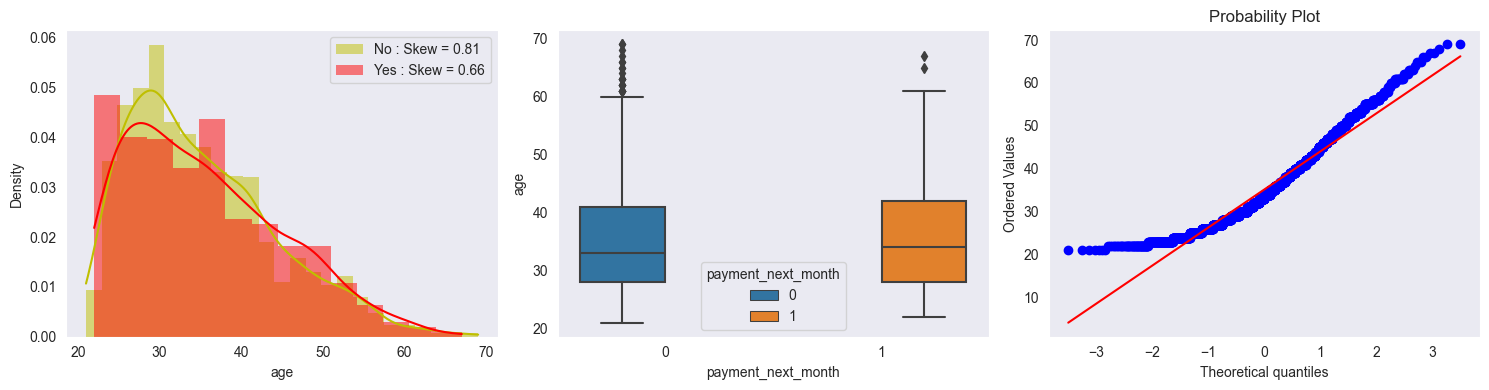

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


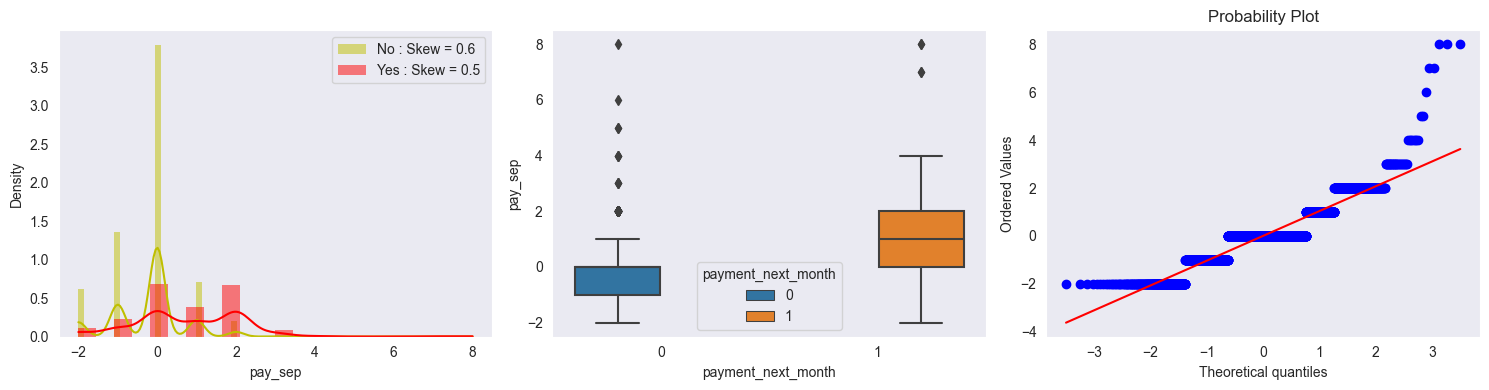

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


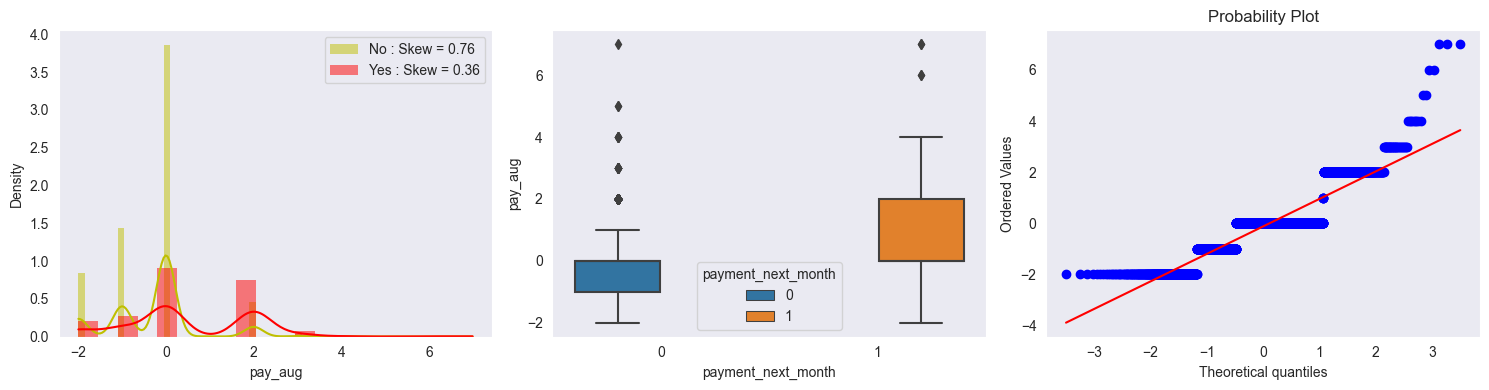

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


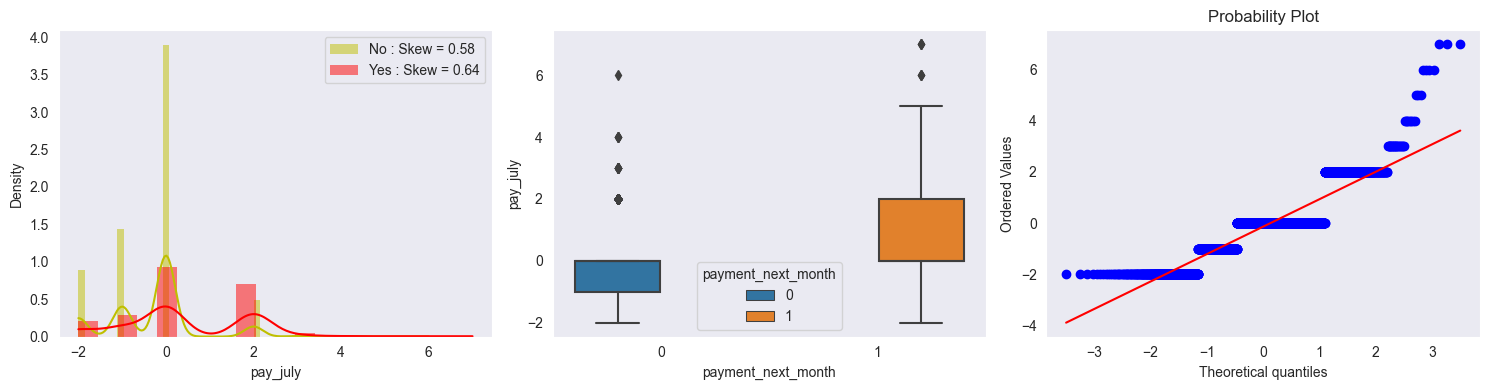

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


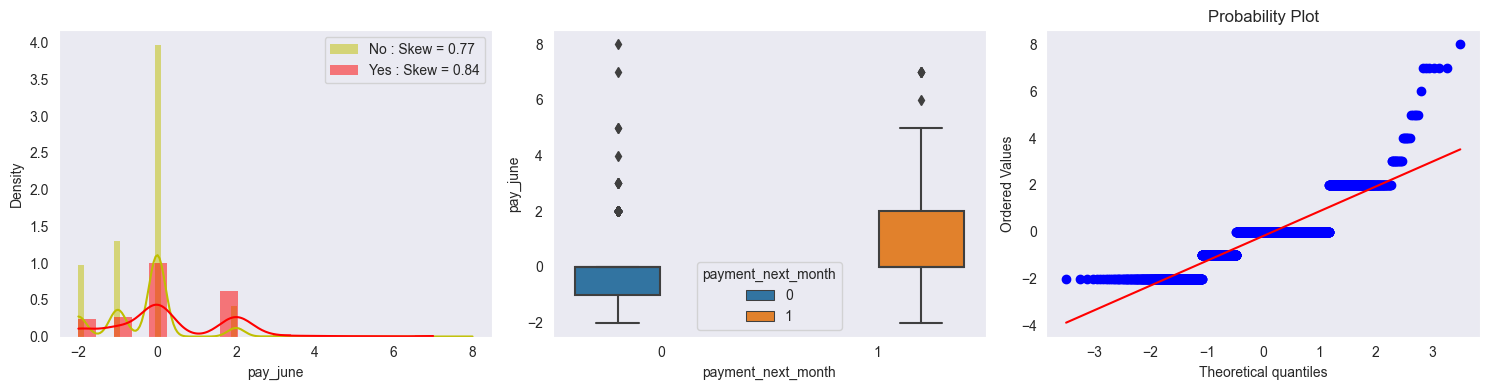

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


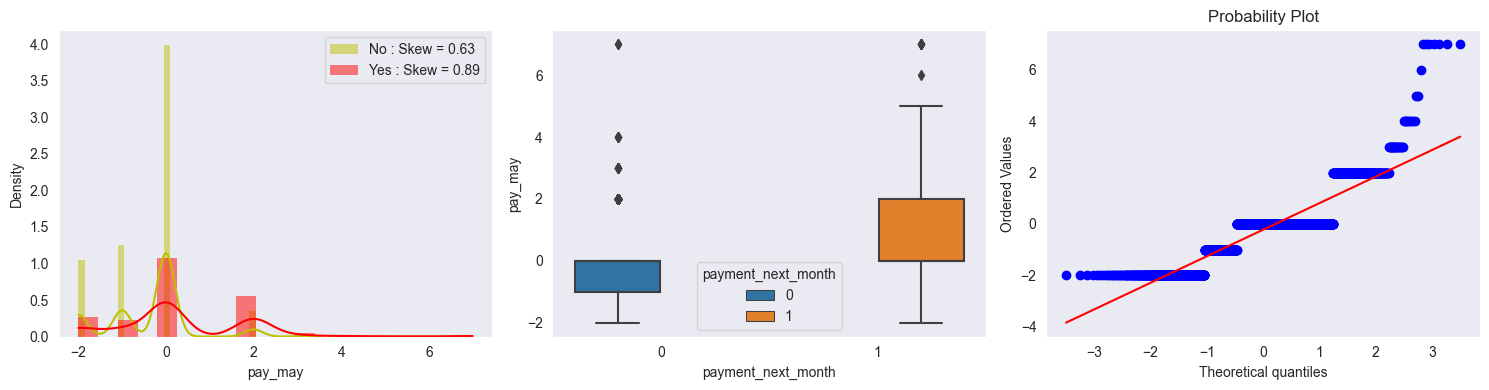

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


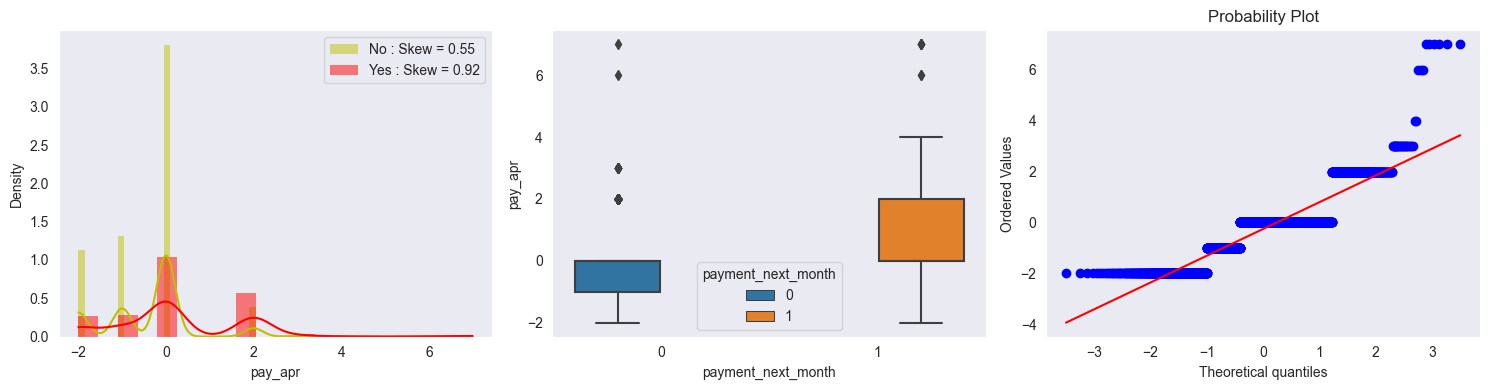

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


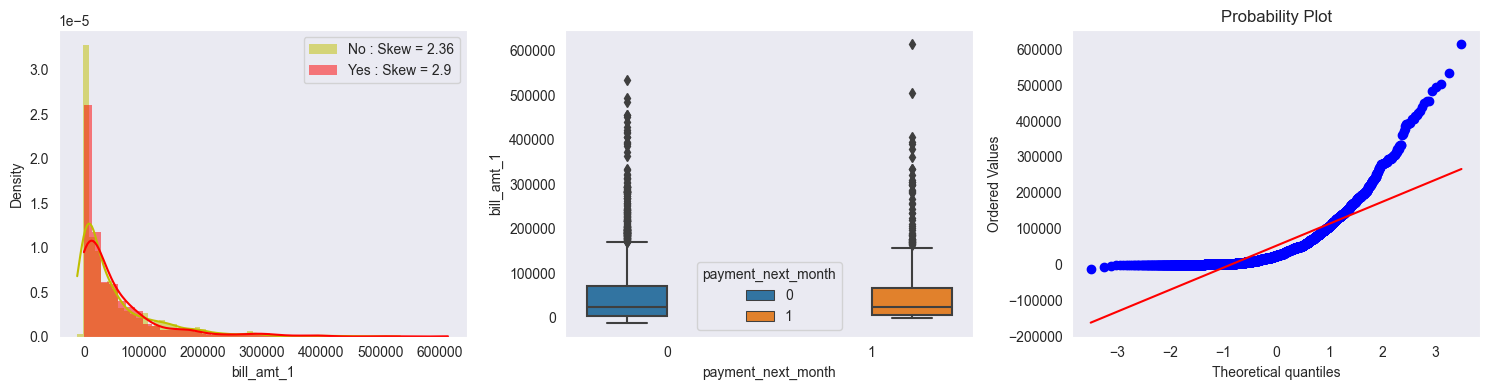

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


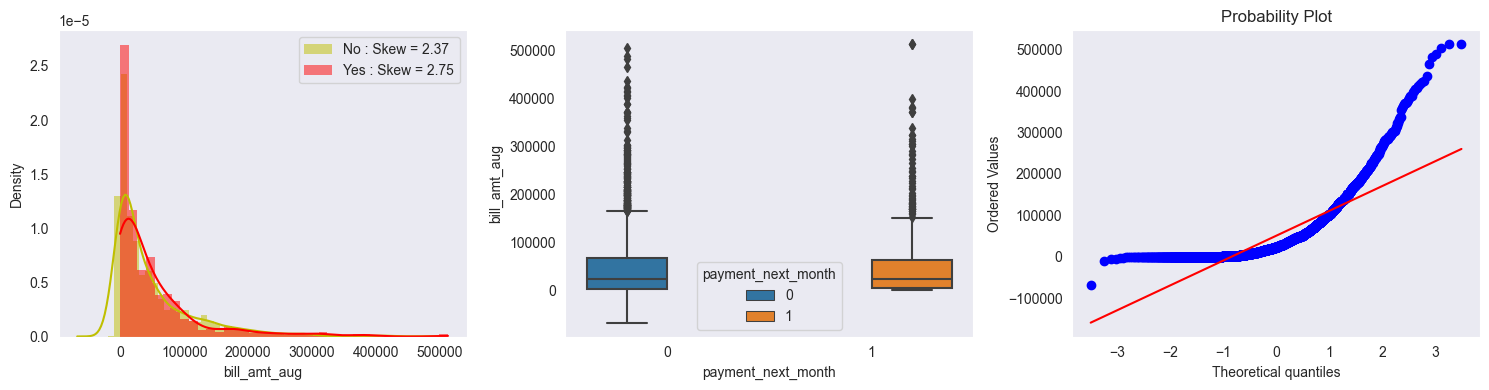

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


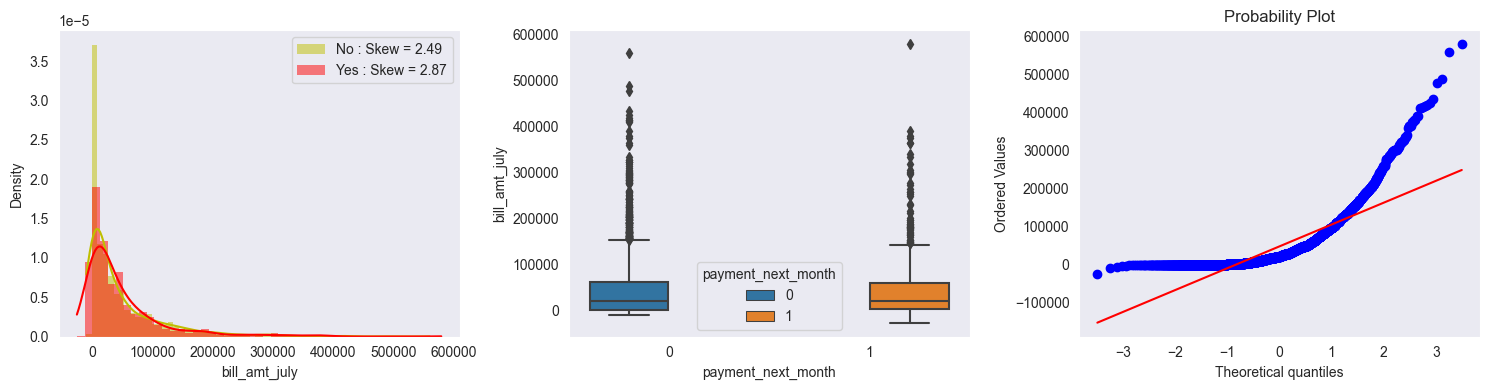

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


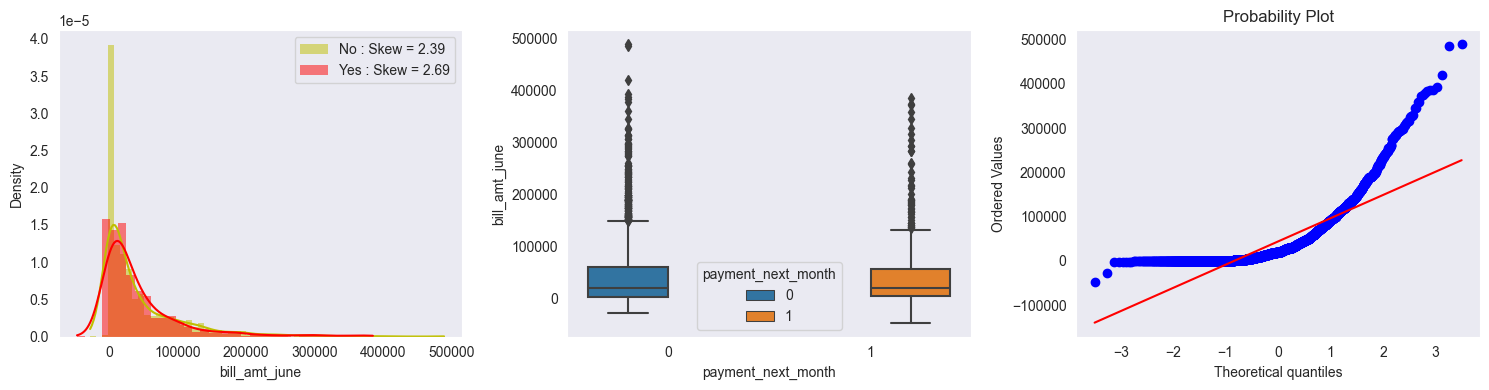

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


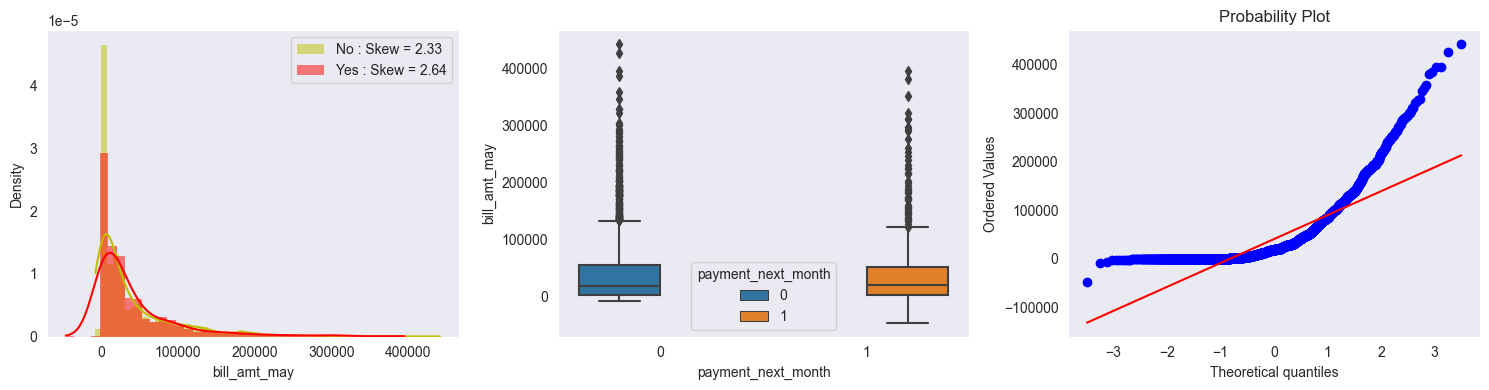

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


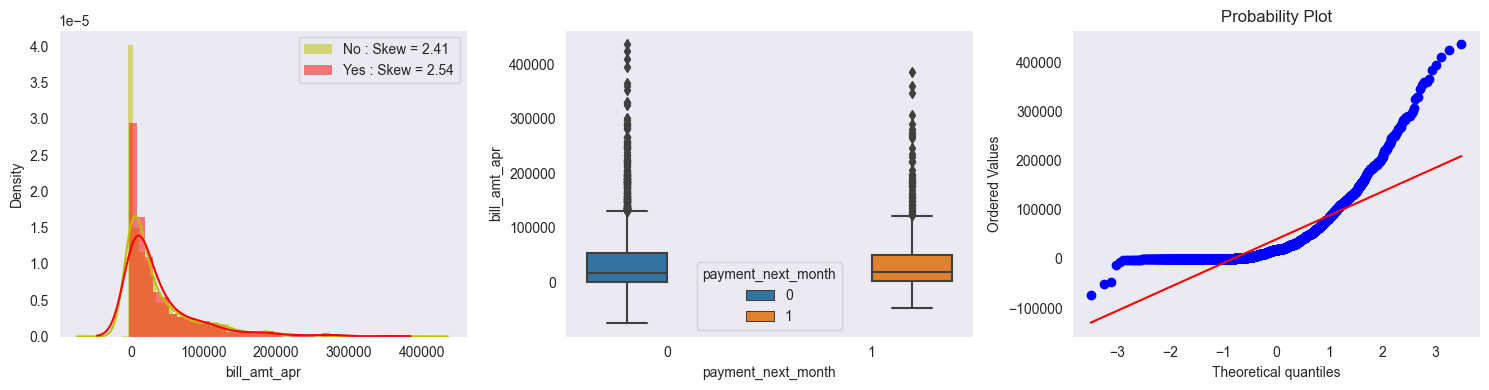

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


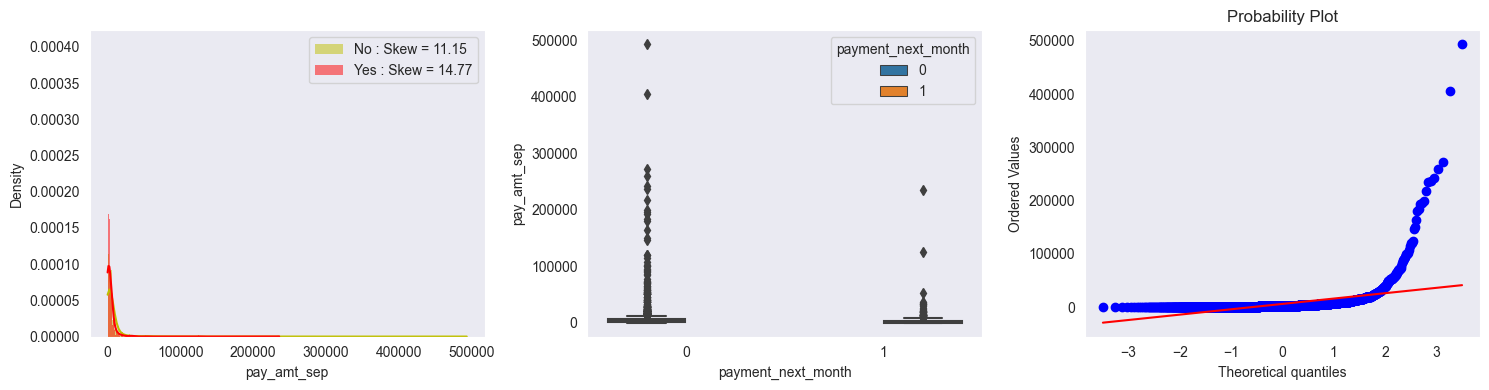

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


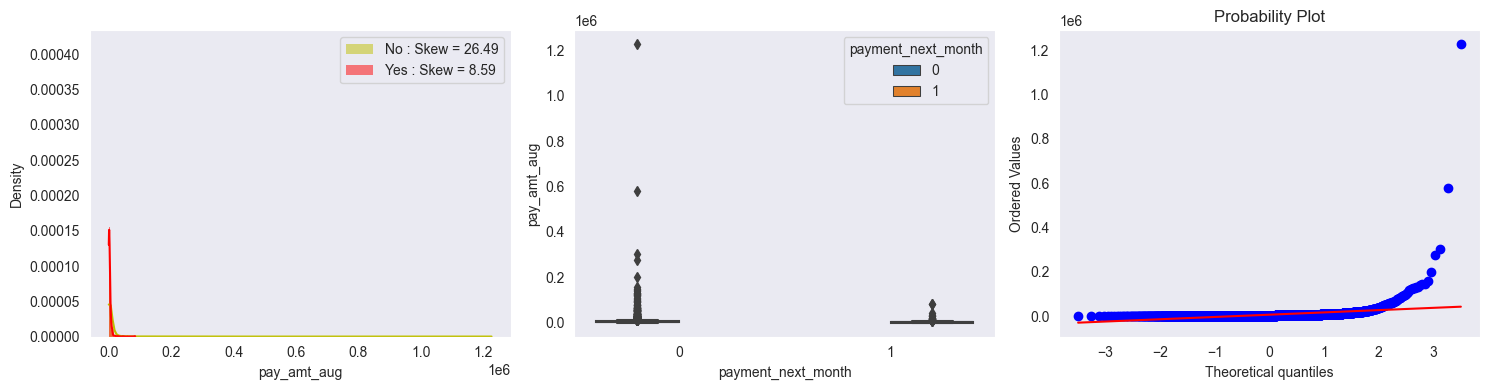

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


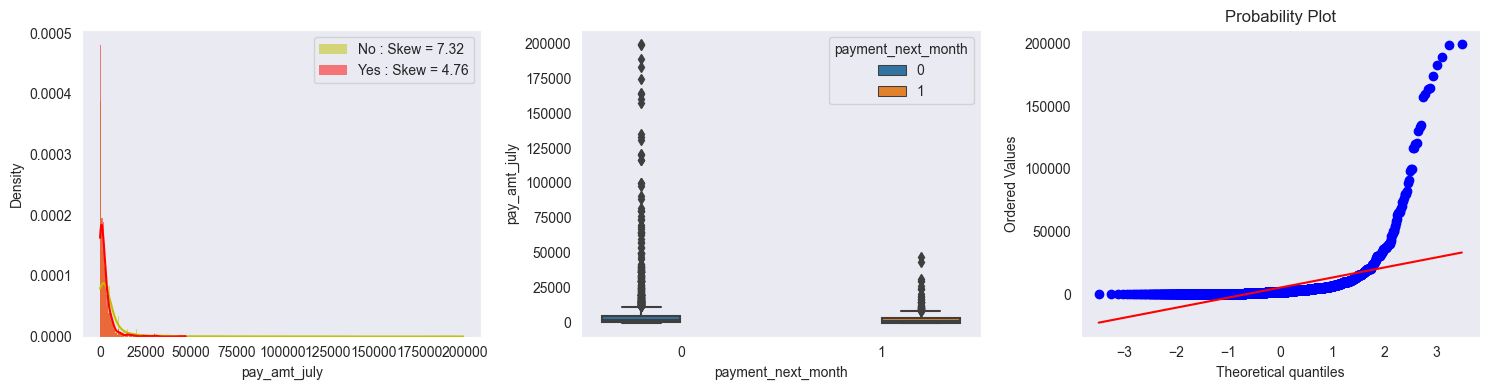

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


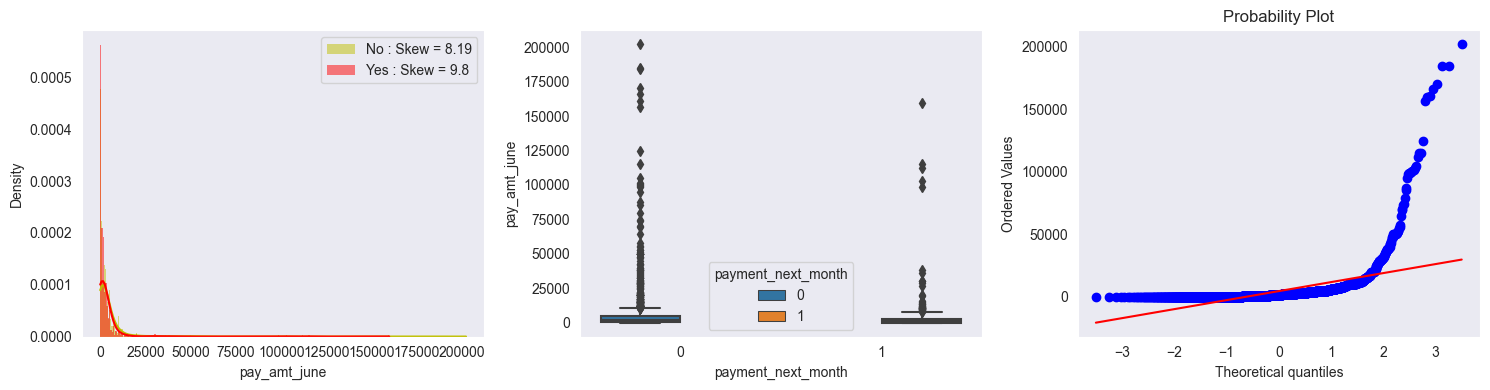

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


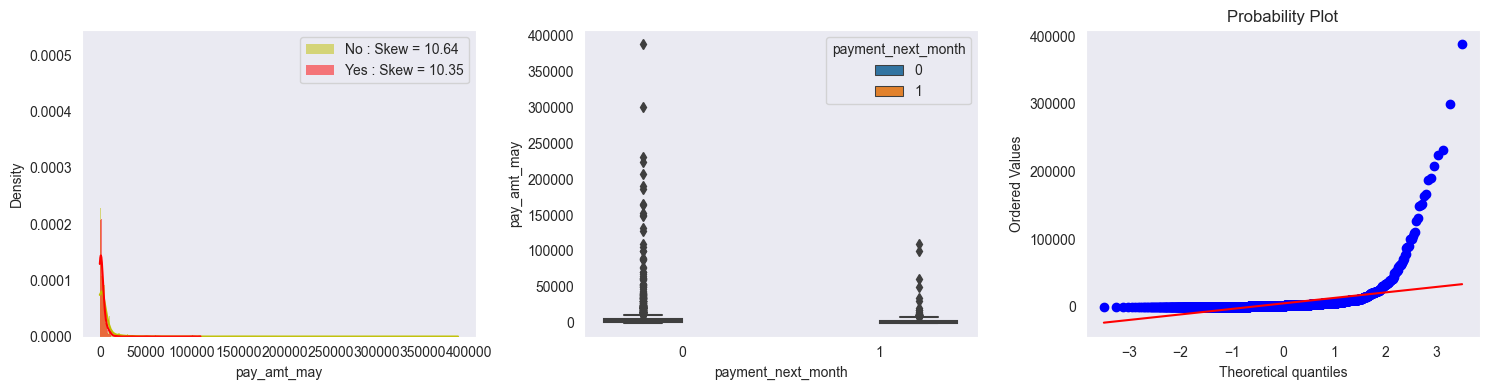

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


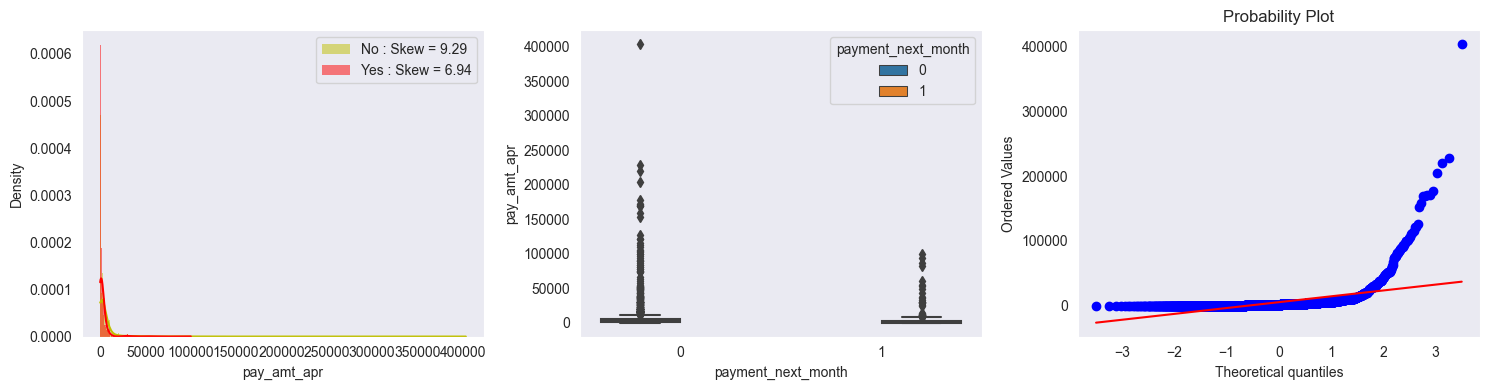

C:\Users\hp\AppData\Local\Temp\ipykernel_15164\3896887321.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


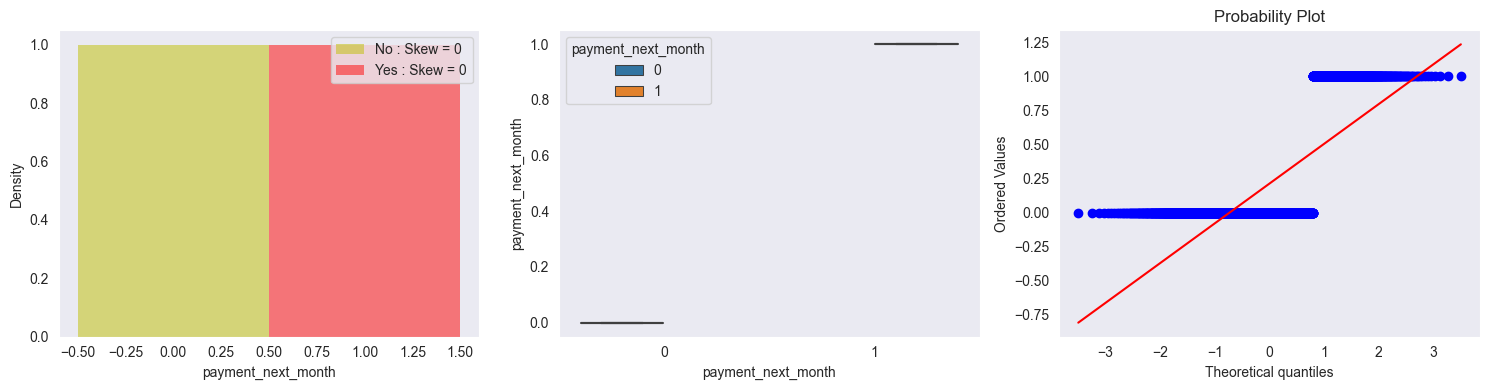

In [58]:
#Visualisasi data
visualize_data_distribution(data, data.columns.values)

Visualisasi data menunjukkan semua data memiliki distribusi tidak normal atau skewed dan semua data numerikal (continue) memiliki outlier.


## Data Preprocessing

Tahap awal pada data processing adalah split data inference dan data yang akan digunakan untuk pemodelan. Data inference ini digunakan untuk melakukan pengujian terhadap pemodelan yang telah kita buat.

In [61]:
# Get Data for Model Inference
data_inf = data.sample(10, random_state =17)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,...,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,payment_next_month
91,500000.0,1,1,1,30.0,0.0,0.0,0.0,0.0,0,...,78946.0,76689.0,77968.0,2800.0,3500.0,2818.0,2743.0,3000.0,10000.0,0
325,90000.0,1,1,1,35.0,0.0,0.0,2.0,2.0,2,...,18574.0,19721.0,19254.0,3100.0,1000.0,0.0,1600.0,0.0,800.0,1
47,170000.0,1,1,1,34.0,0.0,0.0,0.0,0.0,0,...,35377.0,29141.0,21955.0,2005.0,2000.0,1514.0,1006.0,1000.0,220.0,0
1488,370000.0,2,3,2,31.0,-1.0,-1.0,-1.0,2.0,-1,...,35194.0,3728.0,2241.0,1674.0,42921.0,0.0,3728.0,2300.0,43183.0,0
446,530000.0,1,2,1,54.0,-2.0,-2.0,-2.0,-2.0,-1,...,390.0,166210.0,129716.0,0.0,1200.0,390.0,166210.0,6000.0,3000.0,0
567,180000.0,2,3,1,45.0,-1.0,-1.0,-1.0,-1.0,-1,...,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,0
1473,190000.0,2,1,2,41.0,-1.0,-1.0,-1.0,-1.0,-1,...,0.0,26854.0,554.0,0.0,16500.0,0.0,26854.0,500.0,0.0,1
548,500000.0,2,1,1,37.0,-1.0,-1.0,-1.0,-1.0,0,...,159738.0,158400.0,160588.0,1413.0,14123.0,159738.0,4285.0,5001.0,4294.0,0
1768,360000.0,2,1,1,28.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1781,500000.0,1,1,1,35.0,-2.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [62]:
# Remove Inference -set from Dataset
data_train_test = data.drop(data_inf.index)

In [63]:
# Reset Index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace = True)
data_inf.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,...,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,payment_next_month
0,500000.0,1,1,1,30.0,0.0,0.0,0.0,0.0,0,...,78946.0,76689.0,77968.0,2800.0,3500.0,2818.0,2743.0,3000.0,10000.0,0
1,90000.0,1,1,1,35.0,0.0,0.0,2.0,2.0,2,...,18574.0,19721.0,19254.0,3100.0,1000.0,0.0,1600.0,0.0,800.0,1
2,170000.0,1,1,1,34.0,0.0,0.0,0.0,0.0,0,...,35377.0,29141.0,21955.0,2005.0,2000.0,1514.0,1006.0,1000.0,220.0,0


Setelah memisahkan data inference dan data pemodelan, **pisahkan** atribut **feature** dan **target**.

In [65]:
# Splitting between 'X' and 'y'
X = data_train_test.drop(['payment_next_month'], axis = 1)

#menghapus kolom price, dari axis 1 = kolom, axis 0 = baris
y = data_train_test['payment_next_month']
X.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,...,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr
0,50000.0,1,3,0,50.0,0.0,0.0,0.0,-1.0,-1,...,0.0,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0
1,200000.0,2,3,0,45.0,-2.0,-2.0,-2.0,-2.0,-2,...,0.0,399.0,1396.0,0.0,2430.0,0.0,399.0,1396.0,0.0,0.0
2,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0


Langkah selanjutnya memisahkan train set dan test set.

In [66]:
# Splitting between Train-set and Test-set
# Set 0.2 for 20% test-set and 80% train-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4,stratify=y)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2364, 23)
Test Size :  (591, 23)


Setelah melakukan split, trainset berjumlah 2364 data dan test set berjumlah 591 data.

### Data Cleaning

**Handle Outliers**

Berdasarkan pengecekan outlier pada proses EDA, didapatkan bahwa semua atribut continues memiliki outliers yang cukup signifikan. Jika memutuskan handling data dengan meremove data outlier, maka akan beresiko kehilangan banyak informasi. Namun, jika memutuskan untuk handling data dengan mengimputasi datanya maka akan beresiko terhadap hasil analisis data. Dengan demikian diputuskan untuk tidak menghandle outliers dari seluruh atribut.

**Handle Missing Values**

In [21]:
X_train.isna().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [22]:
# Check Missing Value in 'X_train'
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [23]:
# Check Missing Value in 'X_test'
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [24]:
# Check Missing Values in 'y_train'
y_train.isnull().sum()

0

In [25]:
# Check Missing Values in 'y_train'
y_test.isnull().sum()

0

Setelah melakukan pengecekan, tidak ditemukan adanya missing values sehingga data clean selesai disini.

### Fiture Selection

Pada fiture selection, kita akan mencari tahu atribut apa saja yang mempengaruhi pembayaran tagihan kartu kredit pada bulan berikutnya. Algoritma yang akan dipakai pada fiture selection adalah ANOVA yang biasa digunakan untuk data klasifikasi. Sebelum melakukan feature selection, dilakukan normalisasi data menggunakan algoritma MinMaxdScaler. Algoritma MinMaxScaler digunakan karena semua fiture/atribut memiliki distribusi yang skew.

In [67]:
#Definisikan scalling
scaler = MinMaxScaler()

# Fit scaler, hanya untuk X_train saja
scaler.fit(X_train)

#Transform X_train dan X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
#Display num_scaled
X_train_scaled

array([[0.05063291, 1.        , 0.33333333, ..., 0.0065025 , 0.00209755,
        0.00242379],
       [0.18987342, 0.        , 0.33333333, ..., 0.02226885, 0.01236887,
        0.01115242],
       [0.11392405, 1.        , 0.33333333, ..., 0.00494863, 0.00257685,
        0.00145229],
       ...,
       [0.46835443, 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.24050633, 1.        , 0.33333333, ..., 0.01011995, 0.00346844,
        0.00296406],
       [0.24050633, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [153]:
#List kategori kolom untuk menunjukkan label kolom pada pembuatan dataframe hasll scalling
ls_columns_train = list(X_train)
ls_columns_test = list(X_test)

In [74]:
# instansiasi objek untuk anova
anova_fs = SelectKBest(score_func=f_classif,k='all')

In [75]:
# fitting ke data
anova_fs = anova_fs.fit(X_train_scaled, y_train)

df_anova_fs = pd.Series(data=anova_fs.scores_, index = ls_columns_train).sort_values(ascending=False)

Text(0.5, 1.0, 'F-Score setiap atribut numerik terhadap Target')

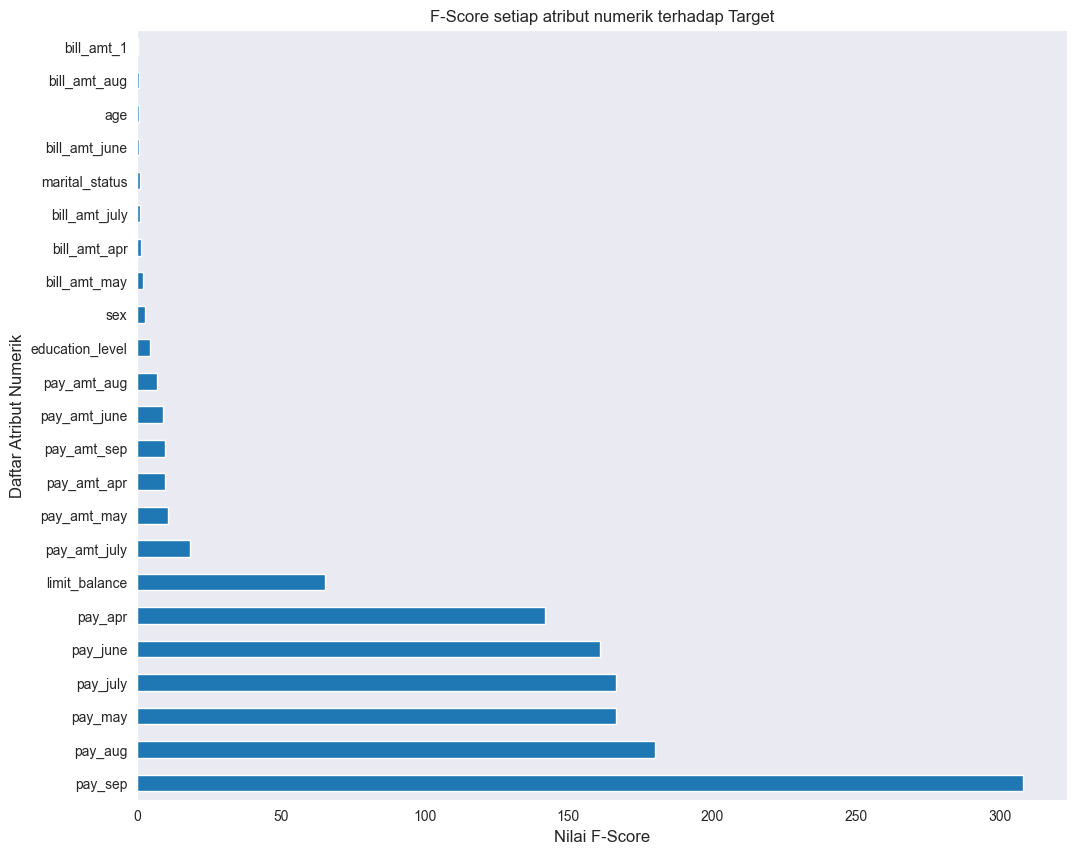

In [76]:
# Plotting score setiap atribut
plt.figure(figsize=(12,10))
df_anova_fs.plot(kind='barh')
plt.ylabel('Daftar Atribut Numerik', fontsize=12)
plt.xlabel('Nilai F-Score', fontsize=12)
plt.title('F-Score setiap atribut numerik terhadap Target',fontsize=12)

Fiture selection menggunakan ANOVA menunjukkan fiture yang memberi pengaruh terhadap pembayaran kartu kredit bulan depan antara lain informasi payment bulan april hingga, limit balance.  mengenai jumlah pembayaran bulan ini **bill_amt** dan jumlah pembayaran bulan sebelumnya **pay_amt** sebenarnya sudah tercakup dalam informasi pembayaran tiap bulan **pay** sehingga data ini dipakai  dalam pemodelan.

In [77]:
#Buat dataframe hasil scalling
X_train_df = pd.DataFrame(X_train_scaled, columns=[ls_columns_train])
X_train_df.head()

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,...,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr
0,0.050633,1.0,0.333333,0.333333,0.104167,0.2,0.222222,0.222222,0.222222,0.222222,...,0.068051,0.111806,0.082059,0.191128,0.003610,0.001643,0.007279,0.006503,0.002098,0.002424
1,0.189873,0.0,0.333333,0.666667,0.250000,0.2,0.222222,0.222222,0.222222,0.222222,...,0.138895,0.282604,0.280822,0.380956,0.008918,0.002891,0.401588,0.022269,0.012369,0.011152
2,0.113924,1.0,0.333333,0.666667,0.270833,0.2,0.222222,0.222222,0.222222,0.222222,...,0.057211,0.100051,0.071472,0.193692,0.002781,0.001491,0.007801,0.004949,0.002577,0.001452
3,0.113924,1.0,0.166667,0.666667,0.145833,0.2,0.222222,0.222222,0.222222,0.222222,...,0.160067,0.219400,0.162886,0.276630,0.010135,0.004075,0.021083,0.014846,0.007731,0.007435
4,0.000000,1.0,0.333333,0.666667,0.125000,0.4,0.222222,0.222222,0.222222,0.222222,...,0.030901,0.070072,0.037353,0.162608,0.002278,0.000984,0.005020,0.000876,0.000466,0.000000


In [81]:
#Buat dataframe test set hasil scalling
X_test_df = pd.DataFrame(X_test_scaled, columns=[ls_columns_test])
X_test_df.head()

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,...,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr
0,0.088608,1.0,0.500000,0.333333,0.187500,0.3,0.111111,0.444444,0.444444,0.000000,...,0.019291,0.052553,0.016856,0.144173,0.003413,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.063291,0.0,0.500000,0.333333,0.708333,0.0,0.000000,0.000000,0.000000,0.000000,...,0.016728,0.053244,0.017650,0.144873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.025316,0.0,0.333333,0.666667,0.062500,0.0,0.000000,0.000000,0.000000,0.000000,...,0.016728,0.053244,0.017650,0.144873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.088608,1.0,0.333333,0.333333,0.291667,0.2,0.222222,0.222222,0.222222,0.222222,...,0.142692,0.195815,0.120874,0.237471,0.007321,0.002306,0.011014,0.008893,0.005154,0.004957
4,0.050633,0.0,0.166667,0.666667,0.125000,0.2,0.222222,0.222222,0.444444,0.444444,...,0.081053,0.130688,0.104423,0.223510,0.003243,0.001821,0.015270,0.000000,0.004381,0.004957


Analisis :

Atribut numerical yang mempengaruhi pembayaran tagihan kartu kredit bulan depan adalah 'limit_balance', 'pay_amt_3' 'pay_amt_5'

In [79]:
#Final Final Dataframe Train-Set
X_train_ = ['limit_balance' ,'pay_sep', 'pay_aug', 'pay_july', 'pay_june','pay_may','pay_apr']
X_train_final = X_train_df[X_train_]
X_train_final.head()

,limit_balance,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr
0,0.050633,0.2,0.222222,0.222222,0.222222,0.222222,0.222222
1,0.189873,0.2,0.222222,0.222222,0.222222,0.222222,0.222222
2,0.113924,0.2,0.222222,0.222222,0.222222,0.222222,0.222222
3,0.113924,0.2,0.222222,0.222222,0.222222,0.222222,0.222222
4,0.000000,0.4,0.222222,0.222222,0.222222,0.222222,0.222222


In [82]:
#Final Dataframe Test-Set
X_test_ = ['limit_balance' ,'pay_sep', 'pay_aug', 'pay_july', 'pay_june','pay_may','pay_apr']
X_test_final = X_test_df[X_train_]
X_train_final.head()

,limit_balance,pay_sep,pay_aug,pay_july,pay_june,pay_may,pay_apr
0,0.050633,0.2,0.222222,0.222222,0.222222,0.222222,0.222222
1,0.189873,0.2,0.222222,0.222222,0.222222,0.222222,0.222222
2,0.113924,0.2,0.222222,0.222222,0.222222,0.222222,0.222222
3,0.113924,0.2,0.222222,0.222222,0.222222,0.222222,0.222222
4,0.000000,0.4,0.222222,0.222222,0.222222,0.222222,0.222222


## Model Definition

Pemodelan ini akan membandingkan 7 model dengan parameter default yaitu logistic regression, SVM, Decision Tree, Random Forest, Kneighbors, Naive Bayes, Adaboost.

In [103]:
#Model Definition
#Logistic Regression
logistic = LogisticRegression(random_state=14)
#Model Definition
svc = SVC(random_state=14)
#Decision Tree
tree = DecisionTreeClassifier(random_state=14)
#Random Forest
forest = RandomForestClassifier(random_state=14)
#KNN
knn = KNeighborsClassifier()
#Naive Bayes
nb = GaussianNB()
#Adaboost
AdaBoost = AdaBoostClassifier(random_state=14)

## Model Training

Pada tahap ini setiap model dengan parameter default akan dilatih. Kemudian setiap model akan di cross validasi sebanyak 5 kali. Model dengan hasil cross validasi terbaik akan di tunning.

In [105]:
#Model Training
#Logistic Regression
%timeit logistic.fit(X_train_final, y_train)
#SVM
%timeit svc.fit(X_train_final, y_train)
#Decision Tree
%timeit tree.fit(X_train_final, y_train)
#Random Forest
%timeit forest.fit(X_train_final, y_train)
#KNN
%timeit knn.fit(X_train_final, y_train)
#Naive Bayes
%timeit nb.fit(X_train_final, y_train)
#Adaboost
%timeit AdaBoost.fit(X_train_final, y_train)

37.5 ms ± 4.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
335 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.6 ms ± 470 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
622 ms ± 19.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.8 ms ± 576 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.45 ms ± 691 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
286 ms ± 65.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Cross Validation**

In [100]:
%%time
#Training 
#Logistic Regression
f1_score_test_cross_val_log = cross_val_score(logistic, X_test_final, y_test, cv=5, scoring='f1')
#SVM
f1_score_train_cross_val_svm = cross_val_score(svc, X_train_final, y_train, cv=5,scoring='f1')
#Decision Tree
f1_score_train_cross_val_tree = cross_val_score(tree, X_train_final, y_train, cv=5, scoring='f1')
#Random Forest
f1_score_train_cross_val_forest = cross_val_score(forest, X_train_final, y_train, cv=5, scoring='f1')
#KNN
f1_score_train_cross_val_knn = cross_val_score(knn, X_train_final, y_train, cv=5, scoring='f1')
#Naive Bayes
f1_score_train_cross_val_naive = cross_val_score(nb, X_train_final, y_train, cv=5, scoring='f1')
#AdaBoost
f1_score_train_cross_val_adaboost = cross_val_score(AdaBoost, X_train_final, y_train, cv=5, scoring='f1')

 

CPU times: total: 10.9 s
Wall time: 11.2 s


In [110]:
#Logistic Regression
print('F1 Score - Mean - Cross Validation - Log : ', f1_score_test_cross_val_log.mean())
print('F1 Score - Std - Cross Validation - Log : ', f1_score_test_cross_val_log.std())

F1 Score - Mean - Cross Validation - Log :  0.36013468013468014
F1 Score - Std - Cross Validation - Log :  0.1102325432664267


In [111]:
#SVM
print('F1 Score - Mean - Cross Validation - SVM: ', f1_score_train_cross_val_svm.mean())
print('F1 Score - Std - Cross Validation - SVM : ', f1_score_train_cross_val_svm.std())

F1 Score - Mean - Cross Validation - SVM:  0.49790260614740633
F1 Score - Std - Cross Validation - SVM :  0.04409841728278432


In [112]:
#Decision Tree
print('F1 Score - Mean - Cross Validation - tree: ', f1_score_train_cross_val_tree.mean())
print('F1 Score - Std - Cross Validation - tree : ', f1_score_train_cross_val_tree.std())

F1 Score - Mean - Cross Validation - tree:  0.4187116051369445
F1 Score - Std - Cross Validation - tree :  0.02644252480770524


In [113]:
#Random Forest
print('F1 Score - Mean - Cross Validation - forest: ', f1_score_train_cross_val_forest.mean())
print('F1 Score - Std - Cross Validation - forest : ', f1_score_train_cross_val_forest.std())

F1 Score - Mean - Cross Validation - forest:  0.4615088336097736
F1 Score - Std - Cross Validation - forest :  0.04441956704161344


In [114]:

#KNN
print('F1 Score - Mean - Cross Validation - knn : ', f1_score_train_cross_val_knn.mean())
print('F1 Score - Std - Cross Validation - knn : ', f1_score_train_cross_val_knn.std())

F1 Score - Mean - Cross Validation - knn :  0.44000471006799036
F1 Score - Std - Cross Validation - knn :  0.05612025399626024


In [115]:
#Naive Bayes
print('F1 Score - Mean - Cross Validation - naive : ', f1_score_train_cross_val_naive.mean())
print('F1 Score - Std - Cross Validation - naive : ', f1_score_train_cross_val_naive.std())

F1 Score - Mean - Cross Validation - naive :  0.5011164663897951
F1 Score - Std - Cross Validation - naive :  0.04107982916511839


In [116]:
#AdaBoost
print('F1 Score - Mean - Cross Validation - adaboost : ', f1_score_train_cross_val_adaboost.mean())
print('F1 Score - Std - Cross Validation - adaboost : ', f1_score_train_cross_val_adaboost.std())

F1 Score - Mean - Cross Validation - adaboost :  0.4793341916280701
F1 Score - Std - Cross Validation - adaboost :  0.03733419210372768


Berdasarkan f1 score dari hasil ceoss validarion pada setiap model, didapatkan model terbaik adalah model naive bayes dengan f1 score tertinggi.

**Hyperparameter Tunning**

Parameter yang akan digunakan pada training model naive bayes addalah parameter var_smoothing(variance smoothing). Parameter ini menentukan porsi varians terbesar dari semua fitur yang akan ditambahkan ke varians untuk stabilitas perhitungan.

Gaussian Naive Bayes mengasumsikan bahwa fitur mengikuti distribusi normal yang paling tidak mungkin terjadi di dunia nyata. Jadi untuk mengatasi masalah ini, kita dapat melakukan "transformasi daya" pada setiap fitur agar distribusinya mendekati distribusi normal. Secara default, PowerTransformer menghasilkan fitur yang memiliki mean 0 dan standar deviasi 1.

In [130]:
#Set parameter
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [131]:
#Definisi Model
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

In [132]:
Data_transformed = PowerTransformer().fit_transform(X_train_final)

In [133]:
#Training
gs_NB.fit(Data_transformed, y_train);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [134]:
# Mnecari best parametet
gs_NB.best_params_

{'var_smoothing': 0.8111308307896871}

## Model Evaluation

Untuk melihat performa model, evaluasi dilakukan menggunakan confusion matrix dan f1 score pada tiap model.

In [136]:
#Buat dataframe evaluation
evaluations = pd.DataFrame(columns=['model', 'training_score', 'test_score'])

In [137]:
evaluations.loc[0] = ['Logistic Regression', round(tree.score(X_train_final, y_train), 3), round(tree.score(X_test_final, y_test), 3)]
evaluations.loc[1] = ['SVM', round(svc.score(X_train_final, y_train), 3), round(svc.score(X_test_final, y_test), 3)]
evaluations.loc[2] = ['Decision Tree', round(tree.score(X_train_final, y_train), 3), round(tree.score(X_test_final, y_test), 3)]
evaluations.loc[3] = ['Random Forest', round(forest.score(X_train_final, y_train), 3), round(forest.score(X_test_final, y_test), 3)]
evaluations.loc[4] = ['KNN', round(knn.score(X_train_final, y_train), 3), round(knn.score(X_test_final, y_test), 3)]
evaluations.loc[5] = ['Naive Bayes', round(nb.score(X_train_final, y_train), 3), round(nb.score(X_test_final, y_test),3)]
evaluations.loc[6] = ['AdaBoost', round(AdaBoost.score(X_train_final, y_train), 3), round(AdaBoost.score(X_test_final, y_test), 3)]
evaluations.loc[7] = ['Naive Bayes Hypertuning', round(gs_NB.score(X_train_final, y_train), 3), round(gs_NB.score(X_test_final, y_test), 3)]

Menghitung False Positive Rate dan True Positive Rate menggunakan roc_curve() dan juga membuat list yang berisi confusion matrix untuk setiap model.(

In [139]:
#Confusion Metrics
confusions = [confusion_matrix(y_test, logistic.predict(X_test_final)),
              confusion_matrix(y_test, svc.predict(X_test_final)),
              confusion_matrix(y_test, tree.predict(X_test_final)),
              confusion_matrix(y_test, forest.predict(X_test_final)),
              confusion_matrix(y_test, knn.predict(X_test_final)),
              confusion_matrix(y_test, nb.predict(X_test_final)),
              confusion_matrix(y_test, AdaBoost.predict(X_test_final)),
              confusion_matrix(y_test, gs_NB.predict(X_test_final))]

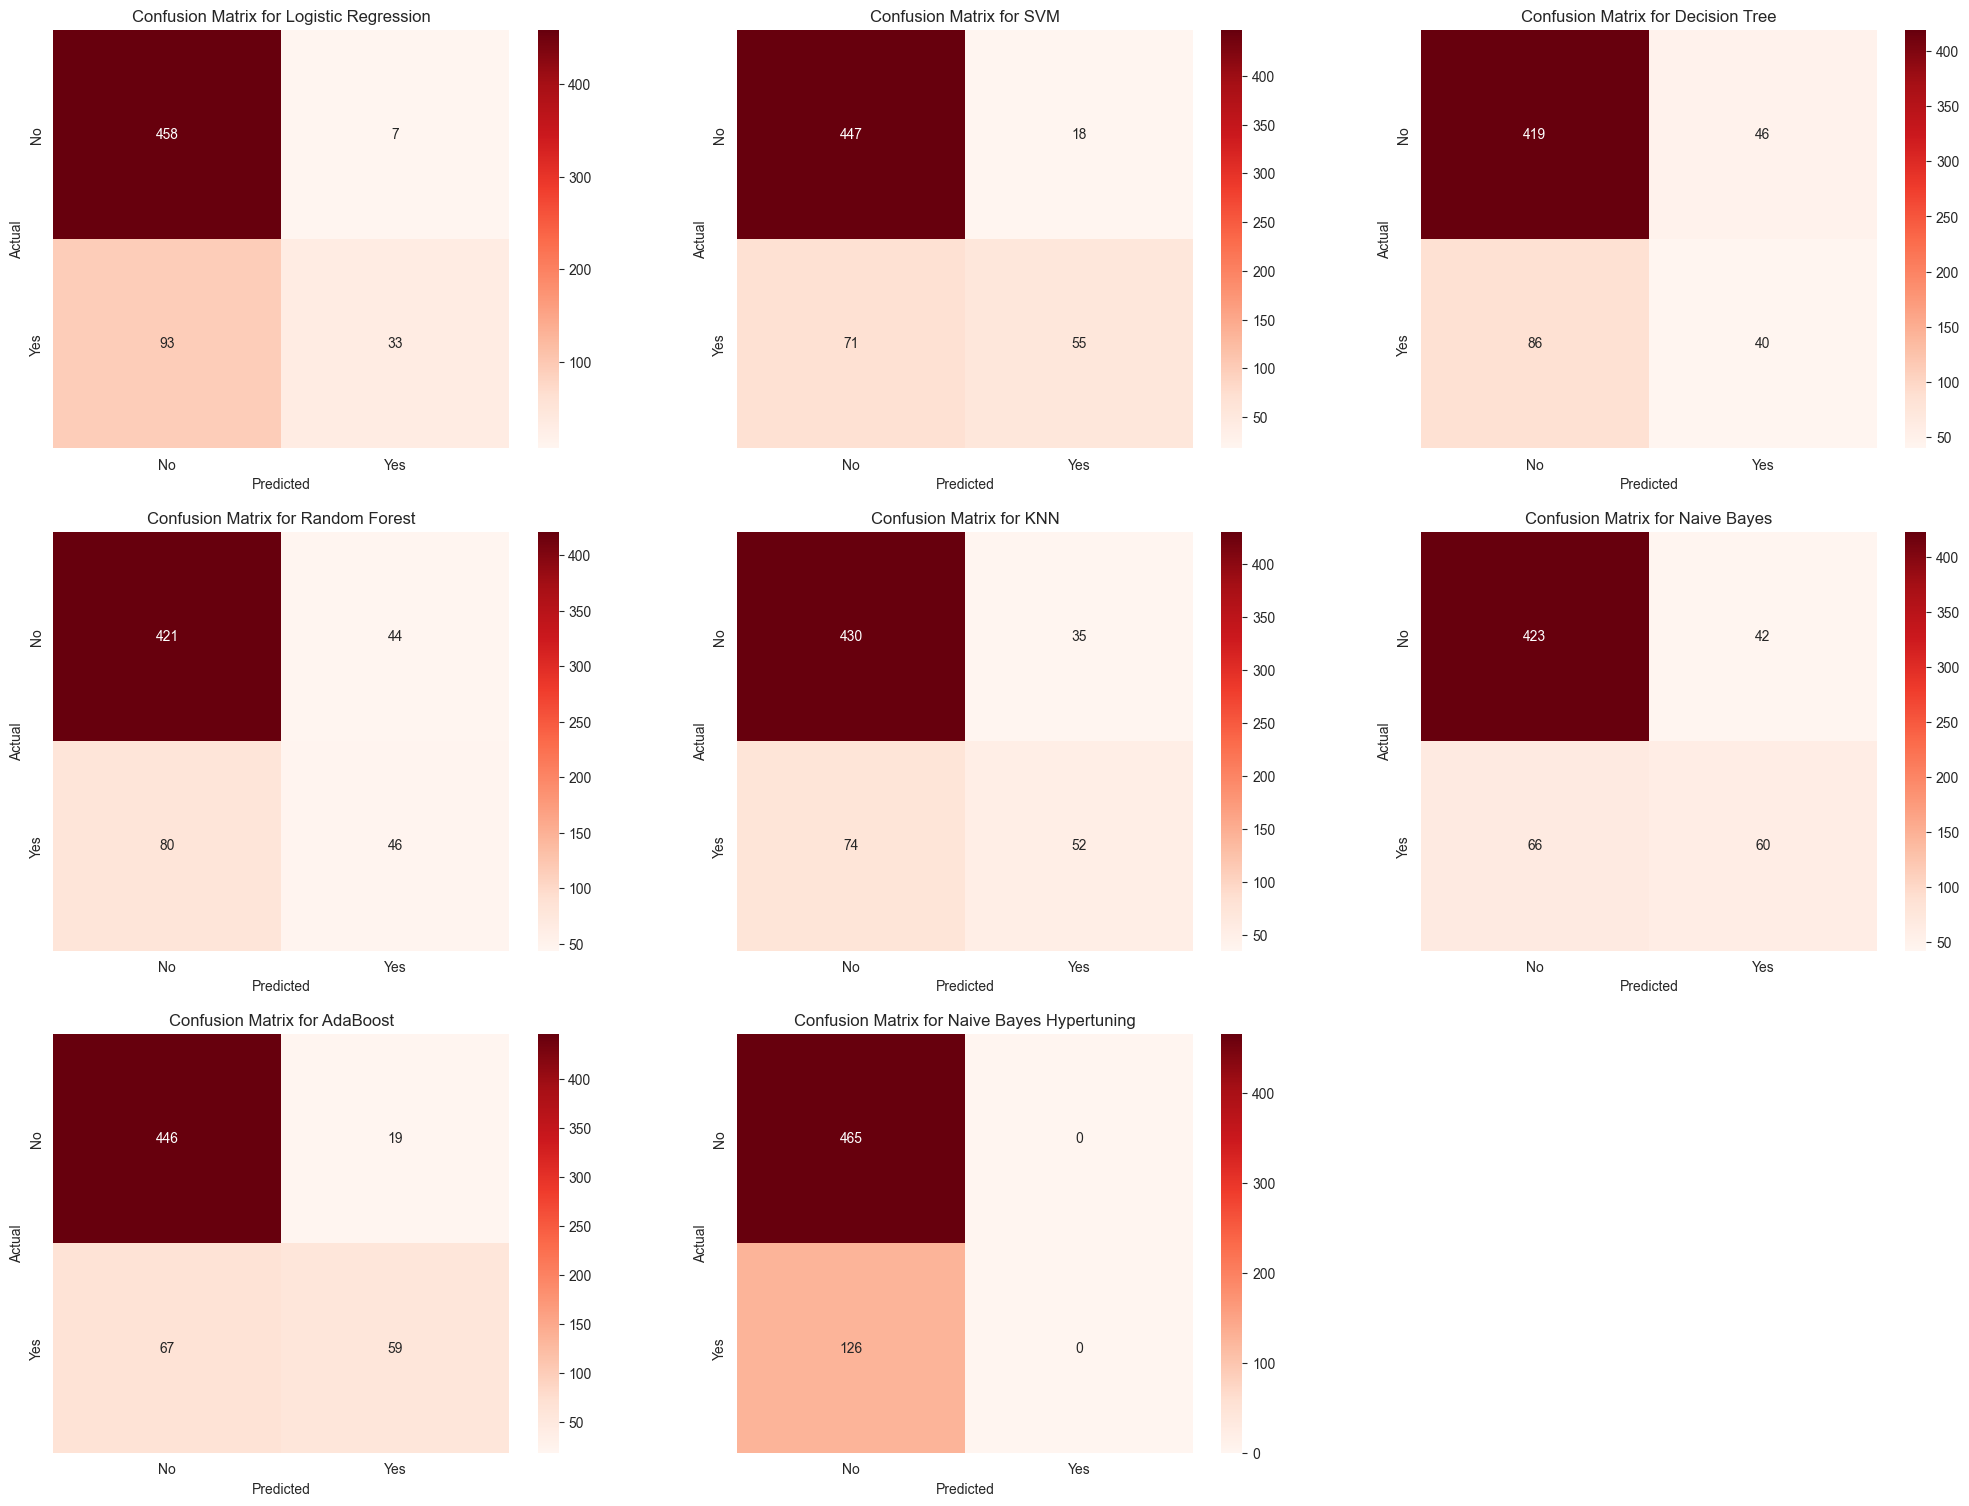

In [140]:
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix for {evaluations.iloc[i, 0]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

Berdasarkan hasil plot confusion matrix, model yang mampu memprediksi dengan baik adalah model databoost. Model ini berhasil memprediksi dengan tepat 446 klien yang tidak membayar tagihan bulan depan dan 59 klien yang membayar tagihan bulan depan.

**Evaluasi Model menggunakan Classification Report**

In [53]:
# Logistic Regression
print("train_log", classification_report(y_train, logistic.predict(X_train_final)))
print("testlog", classification_report(y_test, logistic.predict(X_test_final)))

train_log               precision    recall  f1-score   support

           0       0.83      0.98      0.90      1858
           1       0.77      0.26      0.39       506

    accuracy                           0.82      2364
   macro avg       0.80      0.62      0.64      2364
weighted avg       0.82      0.82      0.79      2364

testlog               precision    recall  f1-score   support

           0       0.84      0.98      0.90       465
           1       0.81      0.30      0.44       126

    accuracy                           0.84       591
   macro avg       0.82      0.64      0.67       591
weighted avg       0.83      0.84      0.80       591



Berdasarkan accuracy score train set dan test set, model logistic regression tergolong goodfit karena nilai accuracy kedua model cukup tinggi. Namun, masih terdapat perbedaan yg cukup signifikan antara accuracy score train set dan test set.

In [54]:
# SVM 
print("train_svm", classification_report(y_train, svc.predict(X_train_final)))
print("test_svm", classification_report(y_test, svc.predict(X_test_final)))

train_svm               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1858
           1       0.73      0.42      0.53       506

    accuracy                           0.84      2364
   macro avg       0.80      0.69      0.72      2364
weighted avg       0.83      0.84      0.83      2364

test_svm               precision    recall  f1-score   support

           0       0.86      0.97      0.91       465
           1       0.77      0.44      0.56       126

    accuracy                           0.85       591
   macro avg       0.82      0.70      0.74       591
weighted avg       0.84      0.85      0.84       591



Berdasarkan accuracy score train set dan test set, model SVM tergolong goodfit karena nilai accuracy kedua model cukup tinggi. Namun, masih terdapat perbedaan yg cukup signifikan antara accuracy score train set dan test set.

In [55]:
# Decision Tree
print("train_tree", classification_report(y_train, tree.predict(X_train_final)))
print("test_tree", classification_report(y_test, tree.predict(X_test_final)))

train_tree               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1858
           1       0.76      0.41      0.53       506

    accuracy                           0.85      2364
   macro avg       0.81      0.69      0.72      2364
weighted avg       0.84      0.85      0.83      2364

test_tree               precision    recall  f1-score   support

           0       0.86      0.97      0.91       465
           1       0.76      0.40      0.53       126

    accuracy                           0.85       591
   macro avg       0.81      0.69      0.72       591
weighted avg       0.84      0.85      0.83       591



Berdasarkan accuracy score train set dan test set, model decision tree tergolong goodfit karena nilai accuracy kedua model cukup tinggi dan tidak perbedaan score diantara kedua dataset.

In [154]:
# Random Forest
print("train_forest", classification_report(y_train, forest.predict(X_train_final)))
print("test_forest", classification_report(y_test, forest.predict(X_test_final)))

train_forest               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1858
           1       1.00      0.99      1.00       506

    accuracy                           1.00      2364
   macro avg       1.00      1.00      1.00      2364
weighted avg       1.00      1.00      1.00      2364

test_forest               precision    recall  f1-score   support

           0       0.86      0.95      0.90       465
           1       0.70      0.44      0.54       126

    accuracy                           0.84       591
   macro avg       0.78      0.69      0.72       591
weighted avg       0.83      0.84      0.82       591



Berdasarkan accuracy score train set dan test set, model random forest tergolong overfit karena terdapat perbedaan yang sangat signifikan antara accuracy score train set dan test set. 

In [57]:
#KNN
print("train_knn", classification_report(y_train, knn.predict(X_train_final)))
print("test_knn", classification_report(y_test, knn.predict(X_test_final)))

train_knn               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1858
           1       0.76      0.54      0.63       506

    accuracy                           0.86      2364
   macro avg       0.82      0.75      0.77      2364
weighted avg       0.86      0.86      0.86      2364

test_knn               precision    recall  f1-score   support

           0       0.85      0.91      0.88       465
           1       0.56      0.43      0.48       126

    accuracy                           0.81       591
   macro avg       0.71      0.67      0.68       591
weighted avg       0.79      0.81      0.80       591



Berdasarkan accuracy score train set dan test set, model tergolong overfit karena terdapat perbedaan yang signifikan antara kedua data train dan data test. 

In [188]:
#Naive Bayes
print("train_naive", classification_report(y_train, nb.predict(X_train_final)))
print("test_naive", classification_report(y_test, nb.predict(X_test_final)))

train_naive               precision    recall  f1-score   support

           0       0.90      0.35      0.51      1858
           1       0.26      0.85      0.40       506

    accuracy                           0.46      2364
   macro avg       0.58      0.60      0.45      2364
weighted avg       0.76      0.46      0.48      2364

test_naive               precision    recall  f1-score   support

           0       0.89      0.32      0.47       465
           1       0.25      0.86      0.39       126

    accuracy                           0.43       591
   macro avg       0.57      0.59      0.43       591
weighted avg       0.76      0.43      0.45       591



Berdasarkan accuracy score train set dan test set, model naive bayes tergolong underfit karena nilai accuracy kedua model sangat rendah. 

In [143]:
#AdaBoost
print("train_AdaBoost", classification_report(y_train, AdaBoost.predict(X_train_final)))
print("test_AdaBoost", classification_report(y_test, AdaBoost.predict(X_test_final)))

train_AdaBoost               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1858
           1       0.70      0.39      0.50       506

    accuracy                           0.83      2364
   macro avg       0.78      0.67      0.70      2364
weighted avg       0.82      0.83      0.82      2364

test_AdaBoost               precision    recall  f1-score   support

           0       0.87      0.96      0.91       465
           1       0.76      0.47      0.58       126

    accuracy                           0.85       591
   macro avg       0.81      0.71      0.75       591
weighted avg       0.85      0.85      0.84       591



Berdasarkan accuracy score train set dan test set, model adaboost tergolong goodfit karena nilai accuracy kedua model cukup tinggi. Namun, masih terdapat perbedaan yg cukup signifikan antara accuracy score train set dan test set.

In [142]:
# Naive Bayes Hyperparameter Tuning
print("train_naive_hypertuning", classification_report(y_train, gs_NB.predict(X_train_final)))
print("test_naive_hypertuning", classification_report(y_test, gs_NB.predict(X_test_final)))

train_naive_hypertuning               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1858
           1       0.00      0.00      0.00       506

    accuracy                           0.79      2364
   macro avg       0.39      0.50      0.44      2364
weighted avg       0.62      0.79      0.69      2364

test_naive_hypertuning               precision    recall  f1-score   support

           0       0.79      1.00      0.88       465
           1       0.00      0.00      0.00       126

    accuracy                           0.79       591
   macro avg       0.39      0.50      0.44       591
weighted avg       0.62      0.79      0.69       591



c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Berdasarkan accuracy score train set dan test set, model naive bayes hyperparameter tuning tergolong underfit karena nilai accuracy kedua model cukup rendah. 

Model Analisis:

Dari hasil evaluasi f1 score pada 8 model didapatkan 4 model yang tergolong goodfit yaitu logistic regression, svm, decision tree dan adaboost. Sedangkan hasil evaluasi confusin matrix menunjukkan bahwa model adaboost model terbaik dalam memprediksi model. Dengan demikian, model adaboost dipilih untuk melakukan testing terhadap data inference.

## Model Inference

In [193]:
#Save files
  
with open('model_adaboost.pkl', 'wb') as file_1:
  joblib.dump(AdaBoost, file_1)
  
with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('list_column_train.txt','w') as file_3:
  json.dump(ls_columns_train, file_3)

with open('list_column_test.txt', 'w') as file_4:
  json.dump(ls_columns_test, file_4)

In [144]:
#Load all files
  
with open('model_adaboost.pkl', 'rb') as file_1:
  model_adaboost = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('list_column_train.txt','r') as file_3:
  list_column_train = json.load(file_3)

with open('list_column_test.txt', 'r') as file_4:
  list_column_test = json.load(file_4)

In [145]:
# Display Inference set
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_july,pay_june,pay_may,...,bill_amt_june,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,payment_next_month
0,500000.0,1,1,1,30.0,0.0,0.0,0.0,0.0,0,...,78946.0,76689.0,77968.0,2800.0,3500.0,2818.0,2743.0,3000.0,10000.0,0
1,90000.0,1,1,1,35.0,0.0,0.0,2.0,2.0,2,...,18574.0,19721.0,19254.0,3100.0,1000.0,0.0,1600.0,0.0,800.0,1
2,170000.0,1,1,1,34.0,0.0,0.0,0.0,0.0,0,...,35377.0,29141.0,21955.0,2005.0,2000.0,1514.0,1006.0,1000.0,220.0,0
3,370000.0,2,3,2,31.0,-1.0,-1.0,-1.0,2.0,-1,...,35194.0,3728.0,2241.0,1674.0,42921.0,0.0,3728.0,2300.0,43183.0,0
4,530000.0,1,2,1,54.0,-2.0,-2.0,-2.0,-2.0,-1,...,390.0,166210.0,129716.0,0.0,1200.0,390.0,166210.0,6000.0,3000.0,0
5,180000.0,2,3,1,45.0,-1.0,-1.0,-1.0,-1.0,-1,...,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,0
6,190000.0,2,1,2,41.0,-1.0,-1.0,-1.0,-1.0,-1,...,0.0,26854.0,554.0,0.0,16500.0,0.0,26854.0,500.0,0.0,1
7,500000.0,2,1,1,37.0,-1.0,-1.0,-1.0,-1.0,0,...,159738.0,158400.0,160588.0,1413.0,14123.0,159738.0,4285.0,5001.0,4294.0,0
8,360000.0,2,1,1,28.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,500000.0,1,1,1,35.0,-2.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [222]:
#Split numeric dan karegorik
#Numerik
numeric_col = ['limit_balance','bill_amt_1','bill_amt_2','bill_amt_3', 'bill_amt_4','bill_amt_5', 'bill_amt_6', 'pay_amt_1','pay_amt_2', 'pay_amt_3', 'pay_amt_4','pay_amt_5','pay_amt_6']
num_column = data_inf[numeric_col]
#Kategorikal
categoric_col = ['sex','education_level', 'marital_status', 'pay_0','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
cat_column = data_inf[categoric_col]

In [223]:
#List kategori kolom untuk menunjukkan label kolom pada pembuatan dataframe hasll scalling
ls_num = list(num_column)
ls_cat = list(cat_column)

In [148]:
# Splitting between 'X' and 'y'
X_inf = data_inf.drop(['payment_next_month'], axis = 1)
y_inf = data_inf['payment_next_month']

Sebelum melakukan predict terhadap data inference, lakukan normalisasi terlebih dahulu dengan scalling data.

In [149]:
# Fit scaler
scaler.fit(X_inf)

MinMaxScaler()

In [150]:
#Transform num_column
X_inf_scaled = scaler.transform(X_inf)
X_inf_scaled

array([[9.31818182e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.69230769e-02, 6.66666667e-01, 1.00000000e+00, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 4.94221788e-01, 4.61398231e-01,
        4.85515730e-01, 9.03225806e-01, 8.15451644e-02, 1.76413878e-02,
        1.65032188e-02, 5.00000000e-01, 2.31572610e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.69230769e-01, 6.66666667e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.13586005e-01,
        2.52057816e-01, 2.45761300e-01, 1.16277905e-01, 1.18651104e-01,
        1.19896879e-01, 1.00000000e+00, 2.32986184e-02, 0.00000000e+00,
        9.62637627e-03, 0.00000000e+00, 1.85258088e-02],
       [1.81818182e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.30769231e-01, 6.66666667e-01, 1.00000000e+00, 5.00000000e-01,
        5.00000000e-01

In [157]:
#Buat DataFrame hasil scalling data

X_inf_df = pd.DataFrame(X_inf_scaled, columns=[list_column_train])
X_inf_df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.931818,0.0,0.0,0.0,0.076923,0.666667,1.0,0.50,0.50,0.50,...,1.000000,0.494222,0.461398,0.485516,0.903226,0.081545,0.017641,0.016503,0.500000,0.231573
1,0.000000,0.0,0.0,0.0,0.269231,0.666667,1.0,1.00,1.00,1.00,...,0.245761,0.116278,0.118651,0.119897,1.000000,0.023299,0.000000,0.009626,0.000000,0.018526
2,0.181818,0.0,0.0,0.0,0.230769,0.666667,1.0,0.50,0.50,0.50,...,0.589343,0.221469,0.175326,0.136716,0.646774,0.046597,0.009478,0.006053,0.166667,0.005095
3,0.636364,1.0,1.0,1.0,0.115385,0.333333,0.5,0.25,1.00,0.25,...,0.510195,0.220323,0.022429,0.013955,0.540000,1.000000,0.000000,0.022429,0.383333,1.000000
4,1.000000,0.0,0.5,0.0,1.000000,0.000000,0.0,0.00,0.00,0.25,...,0.004998,0.002441,1.000000,0.807756,0.000000,0.027958,0.002441,1.000000,1.000000,0.069472
5,0.204545,1.0,1.0,0.0,0.653846,0.333333,0.5,0.25,0.25,0.25,...,0.005075,0.002479,0.002383,0.002466,0.127742,0.009226,0.002479,0.002383,0.066000,0.009170
6,0.227273,1.0,0.0,1.0,0.500000,0.333333,0.5,0.25,0.25,0.25,...,0.211454,0.000000,0.161567,0.003450,0.000000,0.384427,0.000000,0.161567,0.083333,0.000000
7,0.931818,1.0,0.0,0.0,0.346154,0.333333,0.5,0.25,0.25,0.50,...,0.180992,1.000000,0.953011,1.000000,0.455806,0.329046,1.000000,0.025781,0.833500,0.099437
8,0.613636,1.0,0.0,0.0,0.000000,1.000000,0.0,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.931818,0.0,0.0,0.0,0.269231,0.000000,0.0,0.00,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [159]:
#Drop data yang tidak digunakan dalam pemodelan
X_inf_ = ['limit_balance','pay_0', 'pay_2', 'pay_3', 'pay_4','pay_5','pay_6']
X_inf_final = X_inf_df[X_inf_]
X_inf_final.head()

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.931818,0.666667,1.0,0.50,0.5,0.50,0.50
1,0.000000,0.666667,1.0,1.00,1.0,1.00,1.00
2,0.181818,0.666667,1.0,0.50,0.5,0.50,0.50
3,0.636364,0.333333,0.5,0.25,1.0,0.25,0.25
4,1.000000,0.000000,0.0,0.00,0.0,0.25,0.50


**Predict**

In [161]:
# Prediksi menggunakan data inferensial
y_pred_adaboost_ = AdaBoost.predict(X_inf_final)
#Buat dataframe
y_pred_adaboost = pd.DataFrame(y_pred_adaboost_, columns=['payment_adaboost'])

In [164]:
# concate inference set dan price_prediction

data_inf_boost_predic= pd.concat([y_inf, y_pred_adaboost], axis =1)
data_inf_boost_predic[["payment_next_month", "payment_adaboost"]]

,payment_next_month,payment_adaboost
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,0,0
9,1,0


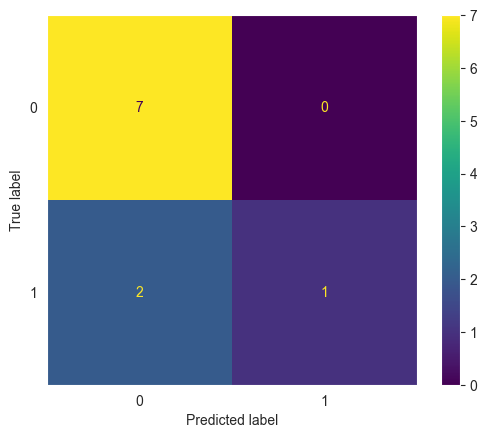

In [166]:
# Confusion Matrix - Test Set
cm_test_boost = confusion_matrix(y_inf, y_pred_adaboost)
ConfusionMatrixDisplay(cm_test_boost).plot()

In [165]:
print("Adaboost", classification_report(y_inf, y_pred_adaboost))

Adaboost               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



Accuracy score menunjukkan performa model cukup baik yaitu 80%. Seperti yang terlihat pada tabel dan confusion matrix, model salah memprediksi 2 data. Model memprediksi 2 klien yang **tidak melakukan pembayaran** bulan depan yang seharusnya merupakan klien yang **melakukan pembayaran**.

## Kesimpulan


Exploratory Data Analysis (EDA)
Dataset yang dimiliki merupakan data yang imbalance. Presentase menunjukkan data klien yang tidak membayar kartu kredit label **No(0)** sebesar **78,6%** dan presentase klien yang membayar kartu kredit label **Yss(1)** sebesar **21,4%**. Dataset menunjukkan jumlah gender**Female** lebih banyak dibanding dengan gender **Male**. Hasil analisis pembayaran tagihan kartu kredit bulan depan menunjukkan mayoritas klien tidak membayar tunggakan untuk bulan saat ini (misal bulan saat ini september, maka tidak melakukan pembayaran untuk bulan september). Rata" klien menunggak satu bulan karena tidak melakukan pembayaran kartu kredit pada bulan saat ini. Namun, membayar tagihan pada bulan sebelumnya karena setiap bulan jumlah kliern yang memiliki tunggakan hanya sedikit. Hal ini menyebabkan mayoritas pembayaran bulan depan adalah klien yang tidak melakukan pembayaran bulan tersebut. Rata" klien memiliki limit balance 163,369 NT$ atau sekitar Rp.81,254,839.50. Rata" klien yang memiliki kartu kredit berusia 35 tahun. Visualisasi data menunjukkan semua data memiliki distribusi tidak normal atau skewed dan semua data numerikal (continue) memiliki outlier.

Preprocessing Data
Pada tahap ini dilakukan scalling terhadap data train menggunakan algoritma MinMaxScaler karena distribusi data skewed. Metode yang dipakai untuk menentukan fiture yang paling berpengaruh dalam penentuan pembayaran kartu kredit **Next Month** adalah infromasi tentang pembayaran klien(apakah memiliki tunggakan atau tidak) dan limit balance kartu kredit klien.

Modelling
Pada prediksi data klasifikai pembayaran kartu kredit dilakukan perbandingan terhadap 7 model default dan 1 model hyperparameter tuning yang merupakan hasil terbaik dari cross validasi diantara semua model. 7 model tersebut diantaranya logistic regression, SVM, decision tree, random forest, KNN, naive bayes, dan adaboost. Model terbaik dari hasil cross validation adalah model adaboost.

Metics yang digunakan pada evaluation model adalah confusion metrics dan f1 score. Accuracy f1 score menunjukkan terdapat 4 model yang tergolong goodfit diantaranya (logitic regression, svm, decision tree dan adaboost), 2 model tergolong overfit(random forest dan knn), 2 model tergolong underfit (naive bayes dan adaboost hyperparameter tunning). Dari perbandingan confusion matrix, model adaboost merupakan model terbaik dalam memprediksi data meskipun tidak cukup baik untuk memprediksi data klien yang melakukan pembayaran tagihan kartu kredit bulan depan. Hal ini dikarenakan data yang tidak seimbang.

Pada evaluasi model terhadap data inference, accuracy f1 score sama dengan 0.8 dan data berhasil memprediksi 8 data dengan benar. Pada model inference, data kembali salah memprediksi data klien yang melakukan pembayaran tagihan kartu kredit bulan depan.

**Coceptual Problems**

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
Jawab: 
Criterion merupakan parameter yang digunakan untuk memisahkan atribut. Setiap kriteria yg dipillih berfungsi untuk mengoptimalkan nilai split dari decision tree.   Contoh kriteria dari decision tree: information_gain, gain_ratio, gain_index, akurasi, least_square.
2. Apakah fungsi dari pruning pada Tree model?
Jawab:
Pruning merupakan salah satu proses pembentukan decision tree. Penerapan pruning pada decision tree mampu mengurangi outlier mauupun noise pada decision tree sehingga performa model dapat lebih baik.
3. Bagaimana cara memilih K yang optimal pada KNN?
jawab: 
Tidak ada metode khusus dalam memilih nilai k, sebaiknya kita melakukan percobaan terhadap beberapa nilai k. Selain itu pertimbangkan dari jumlah kelas data, jika kelas berjumlah genap, pilihlah nilai yang ganjil, begitupun sebaliknya. 
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
Jawab: 
Cross Validation adalah metode yang dipakai untuk menguji kualitas model machine learning. Cara yang dipakai dalam metode Cross Validation adalah dengan melakukan sampel berulang kali.
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
Jawab: 
- Presisi adalah perbandingan antara true positif dengan jumlah data yang diprediksi positif. Semakin kecil false postive maka presisi semakin besar.
- Recall adalah perbandingan antara true positif dan jumlah yang sebenarnya positif. Semakin kecil false negative maka recall semakin besar.
- F1 Score merupakan kombinasi nilai rata" dari recall dan presisi. 
- Accuracy merupakan ratio prediksi benar dengan keseluruhan data.